# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [15]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# получаем имена таблиц из базы
df_tables = pd.read_sql_query("SELECT table_name FROM information_schema.tables WHERE table_schema='public';", conn)
print('Список таблиц в БД:\n', df_tables)

Список таблиц в БД:
                table_name
0              hr_dataset
1        production_staff
2                    male
3                  female
4        recruiting_costs
5         hr_dataset_view
6            numb_of_hire
7           numb_of_terms
8             salary_grid
9               days_work
10         show_functions
11                abu_pay
12                abupay1
13  share_employee_source
14                  tmpDB
15                 abupay


In [16]:
# from IPython.display import Markdown as md
df_hr = pd.read_sql_query("SELECT * FROM hr_dataset;", conn, index_col='id')
print(f"Поля таблицы hr_dataset размером {df_hr.shape}:")
df_hr.head()
# md(df_hr.head().to_string())

Поля таблицы hr_dataset размером (310, 28):


,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
id,,,,,,,,,,,,,,,,,,,,,
1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [17]:
df_prod_staff = pd.read_sql_query("SELECT * FROM production_staff;", conn, index_col='id')
print(f"Поля таблицы production_stuff размером {df_prod_staff.shape}:\n")
df_prod_staff.head()

Поля таблицы production_stuff размером (256, 15):



,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
id,,,,,,,,,,,,,,,
1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [18]:
df_rec_costs = pd.read_sql_query("SELECT * FROM recruiting_costs;", conn, index_col='id')
print(f"Поля таблицы recruiting_costs размером {df_rec_costs.shape}:\n", df_rec_costs.head().to_string())
print()
df_salary_grid = pd.read_sql_query("SELECT * FROM salary_grid;", conn, index_col='id')
print(f"Поля таблицы salary_grid размером {df_salary_grid.shape}:\n", df_salary_grid.head().to_string())

Поля таблицы recruiting_costs размером (22, 14):
              Employment Source  January   February  March  April  May  June  July  August  September  October  November  December  Total
id                                                                                                                                      
1                    Billboard       520       520    520    520    0     0   612     612        729      749       910       500   6192
2                Careerbuilder       410       410    410    820  820   410   410     820        820     1230       820       410   7790
3   Company Intranet - Partner         0         0      0      0    0     0     0       0          0        0         0         0      0
4           Diversity Job Fair         0      5129      0      0    0     0     0    4892          0        0         0         0  10021
5            Employee Referral         0         0      0      0    0     0     0       0          0        0         0         

### Общий обзор данных

Всего в компании сейчас работает сотрудников: 207 



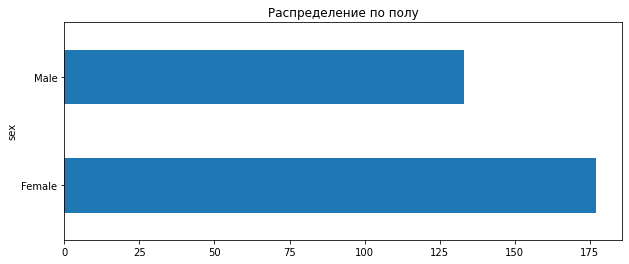

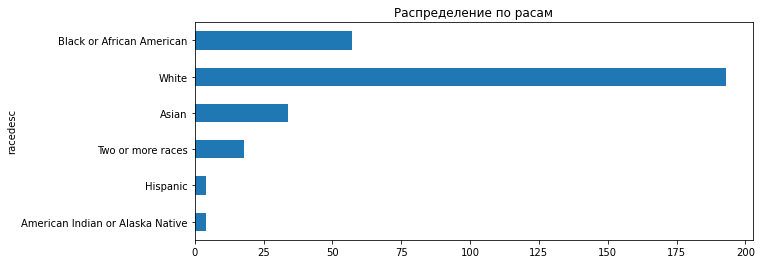

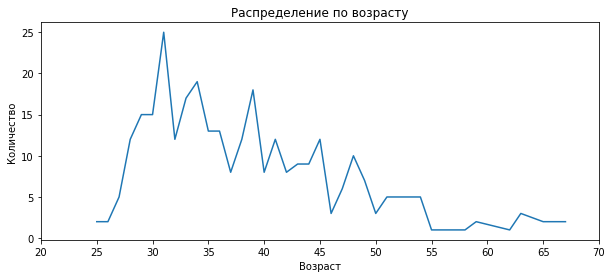

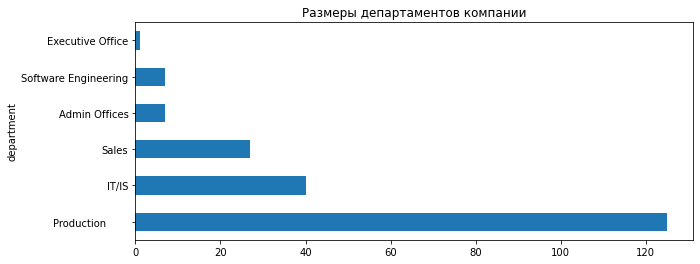

In [19]:
print('Всего в компании сейчас работает сотрудников:',
     pd.read_sql_query(r'select count(*) from hr_dataset where "Date of Termination" is null;', 
                       conn).loc[0, 'count'], '\n')
# Распределение по полу
pd.read_sql_query(r'select sex, count(*) as count from hr_dataset group by sex;', conn, index_col='sex').plot(
                kind = 'barh', title = 'Распределение по полу' , legend = False, figsize=(10, 4));
# Распределение по расам
pd.read_sql_query(r"select racedesc, count(*) from hr_dataset group by racedesc;", conn, index_col='racedesc'
                 ).plot(kind = 'barh', title = 'Распределение по расам' , legend = False, figsize=(10, 4));
# Распределение по возрасту
df_ages = pd.read_sql_query(r"select age, count(*) from hr_dataset group by age order by age;", 
                  conn, index_col='age')
ax = df_ages.plot(title='Распределение по возрасту', legend=False, rot=0, figsize=(10, 4), 
                  xticks=range(20,75,5));
# ax.set_xticks(range(20,75,5))
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество');
df_departments_size = pd.read_sql_query('select department, count(*) from hr_dataset where "Date of Termination" is null group by department order by count desc', 
                                        conn, index_col='department')
df_departments_size.plot.barh(legend=False, figsize=(10, 4), title='Размеры департаментов компании');

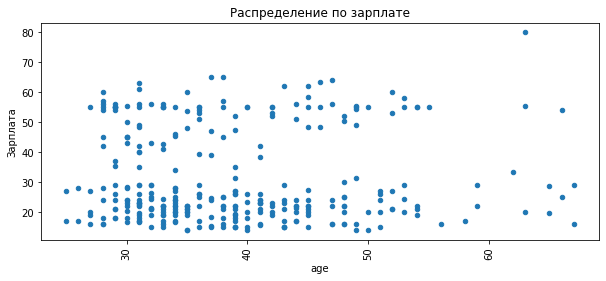

In [20]:
# Распределение по зарплате
ax = df_hr.plot(kind='scatter', title='Распределение по зарплате', rot=90, figsize=(10, 4), 
                 x = 'age', y = 'Pay Rate' );
# ax.set_xticks(range(20,75,5))
# ax.set_xlabel('Возраст')
ax.set_ylabel('Зарплата');


Как видно из графика, зарплата мужчин и женщин практически не отличается. От возраста тоже мало зависит. Но видно, что сотрудников старше 55 лет 
существенно меньше, и зарплата имеет больший разброс


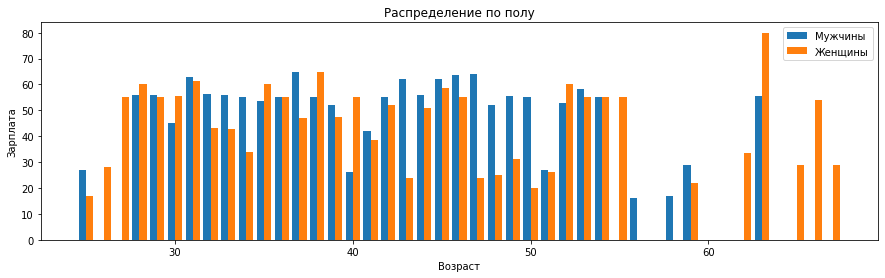

In [21]:
# Строим графики зарплат отдельно от мужчин и женщин, и смотрим, есть ли разница
fig, subplot = plt.subplots(figsize=(15, 4))
subplot.bar(df_hr[df_hr['sex']=='Male']['age']-0.2, df_hr[df_hr['sex']=='Male']['Pay Rate'], width=0.4, label='Мужчины')
subplot.bar(df_hr[df_hr['sex']=='Female']['age']+0.2, df_hr[df_hr['sex']=='Female']['Pay Rate'], width=0.4, label='Женщины')
subplot.set_title('Распределение по полу')
subplot.set_xlabel('Возраст')
subplot.set_ylabel('Зарплата')
subplot.legend();
print('Как видно из графика, зарплата мужчин и женщин практически не отличается. От возраста тоже мало зависит. Но видно, что сотрудников старше 55 лет \n\
существенно меньше, и зарплата имеет больший разброс')

In [22]:
# df_hr[['sex','Pay Rate']].plot.bar(figsize=(15, 4), rot=90)

На данном графике мы не видим явной зависимости зарплаты от срока работы. Но видно, что работающих более 10 лет сотрудников в компании мало.
Также мы видим, что высокооплачиваемых сотрудников меньше, чем низкооплачиваемых


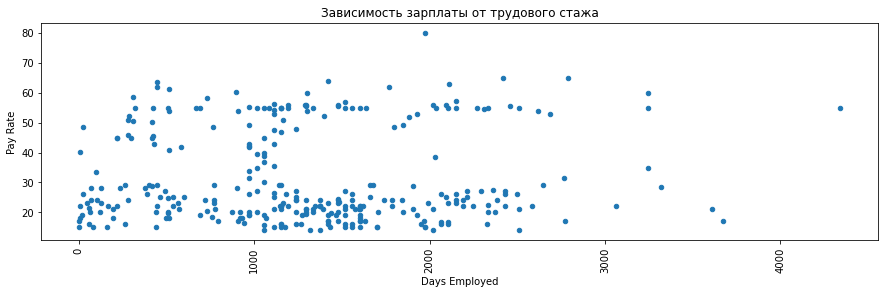

In [23]:
# Анализируем зависимость зарплаты от трудового стажа
df_salary_days = pd.read_sql_query(r'SELECT "Days Employed", "Pay Rate" FROM hr_dataset ORDER BY "Days Employed"', conn)
ax = df_salary_days.plot.scatter('Days Employed', 'Pay Rate', legend=False, rot=90, figsize=(15, 4), title = 'Зависимость зарплаты от трудового стажа')
print('На данном графике мы не видим явной зависимости зарплаты от срока работы. Но видно, что работающих более 10 лет сотрудников в компании мало.\n\
Также мы видим, что высокооплачиваемых сотрудников меньше, чем низкооплачиваемых')

Политкорректность в компании соблюдена. Афроамериканцы и испанцы зарабатывают чуть больше, но вцелом средная зарплата от расы не зависит.


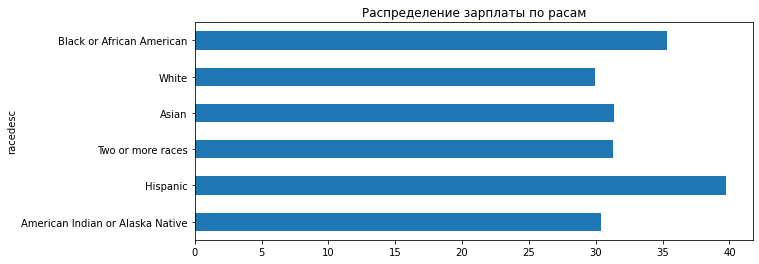

In [24]:
# Распределение по расам
pd.read_sql_query(r'select racedesc, avg("Pay Rate") from hr_dataset group by racedesc;', conn, index_col='racedesc'
                 ).plot(kind = 'barh', title = 'Распределение зарплаты по расам' , legend = False, figsize=(10, 4));
print('Политкорректность в компании соблюдена. Афроамериканцы и испанцы зарабатывают чуть больше, но вцелом средная зарплата от расы не зависит.')

Больше всего зарабатывают топ-менеджеры, меньше всего - техники по производству. Разрыв по доходам между младшими 
и старшими позициями составляет 4 раза (не верю!)


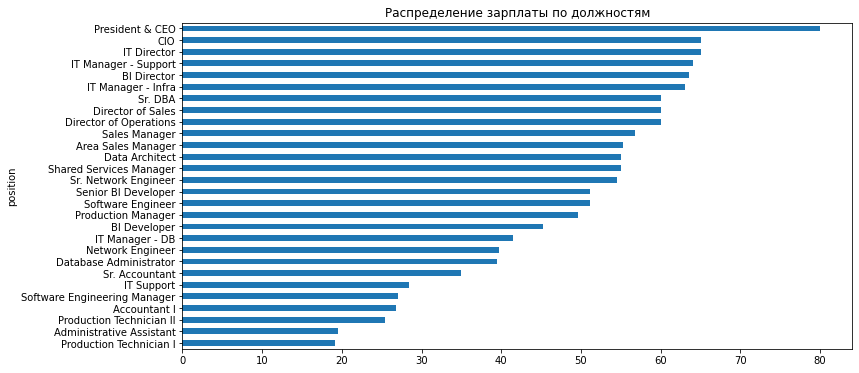

In [25]:
# Распределение по специальностям
pd.read_sql_query(r'select position, avg("Pay Rate") from hr_dataset group by position order by avg;', conn, index_col='position'
                 ).plot(kind = 'barh', title = 'Распределение зарплаты по должностям' , legend = False, figsize=(12, 6));
print('Больше всего зарабатывают топ-менеджеры, меньше всего - техники по производству. Разрыв по доходам между младшими \n\
и старшими позициями составляет 4 раза (не верю!)')

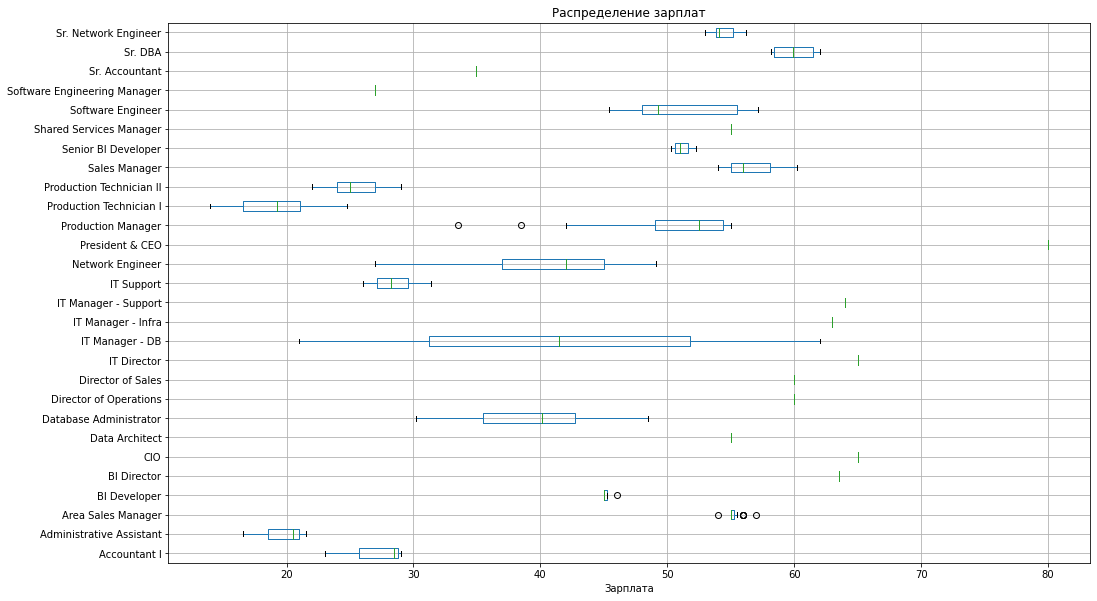

In [26]:
# Распределение зарплат в виде "ящика с усами"
sql_req = """
SELECT "position", "Pay Rate", 
	(SELECT avg("Pay Rate") FROM hr_dataset b WHERE a.position=b.position) AS average
FROM hr_dataset a
ORDER BY average DESC, "position";"""
df_salary1 = pd.read_sql_query(sql_req, conn, index_col='position')
# print(df_salary1.head(20)) # Отладочная информация
df_salary1.boxplot(by='position', column=['Pay Rate'], vert=False, figsize=(16, 10)).set(title='Распределение зарплат', xlabel='Зарплата')
plt.suptitle('');

Text(0, 0.5, '')

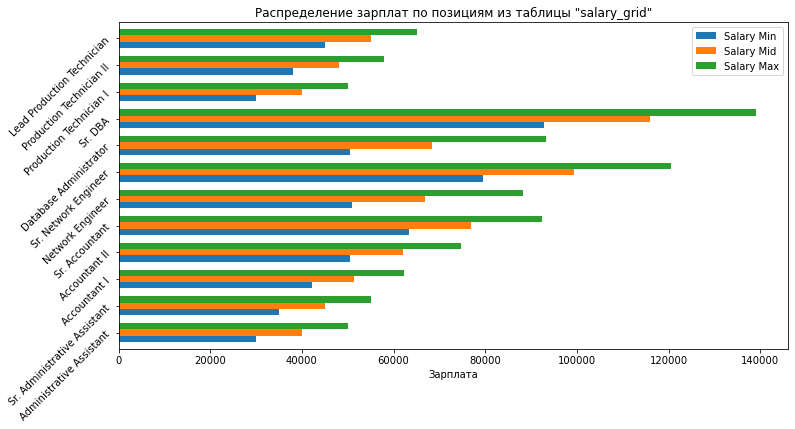

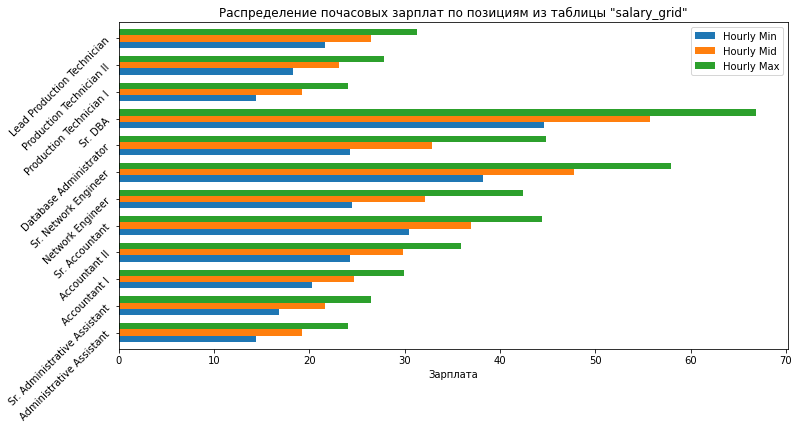

In [27]:
# Визуализация таблицы с уровнем зарплат salary_grid

df_salary_grid = pd.read_sql_query('select * from salary_grid', conn, index_col='id')
ax = df_salary_grid.plot.barh(x='Position', y=['Salary Min', 'Salary Mid', 'Salary Max'], title='Распределение зарплат по позициям из таблицы "salary_grid"',
                         figsize=(12, 6), rot=45, width=0.7)
ax.set(xlabel='Зарплата', ylabel='')

ax = df_salary_grid.plot.barh(x='Position', y=['Hourly Min', 'Hourly Mid', 'Hourly Max'], title='Распределение почасовых зарплат по позициям из таблицы "salary_grid"',
                         figsize=(12, 6), rot=45, width=0.7)
ax.set_xlabel('Зарплата')
ax.set_ylabel('')

In [28]:
# Визуализация таблиы затрат на найм новых сотрудников по источникам recruiting_costs

df_recruiting_costs = pd.read_sql_query('select * from recruiting_costs order by "Employment Source"', conn, index_col='id').set_index('Employment Source')
# print(df_recruiting_costs.to_string())
# df_recruiting_costs.loc[:, 'January':'December']
df_recruiting_costs

,January,February,March,April,May,June,July,August,September,October,November,December,Total
Employment Source,,,,,,,,,,,,,
Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980


                                        January   February  March  April  May  June  July  August  September  October  November  December  Total
Employment Source                                                                                                                               
Billboard                                    520       520    520    520    0     0   612     612        729      749       910       500   6192
Careerbuilder                                410       410    410    820  820   410   410     820        820     1230       820       410   7790
Company Intranet - Partner                     0         0      0      0    0     0     0       0          0        0         0         0      0
Diversity Job Fair                             0      5129      0      0    0     0     0    4892          0        0         0         0  10021
Employee Referral                              0         0      0      0    0     0     0       0          0        0         0   

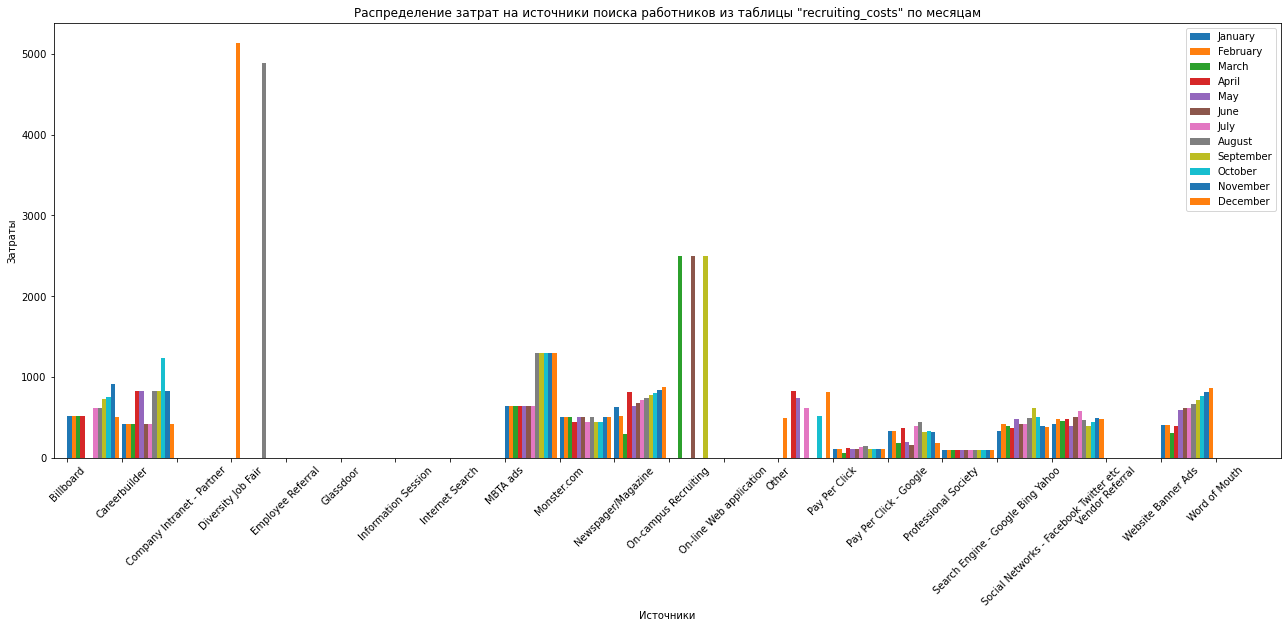

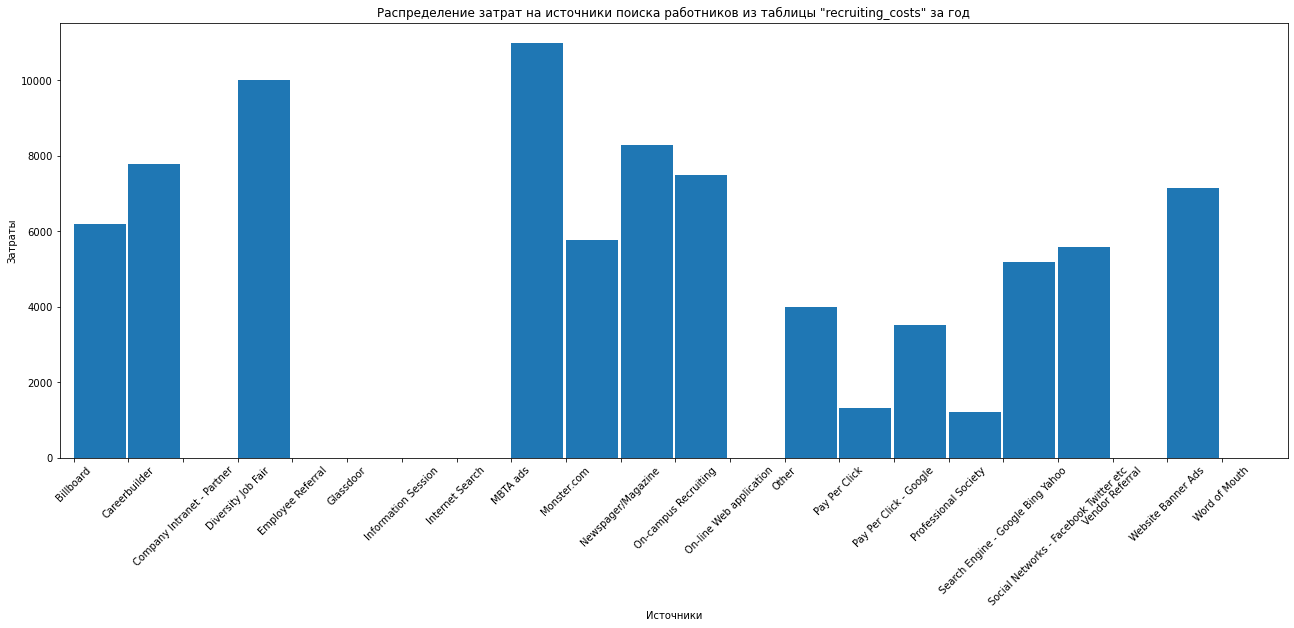

In [29]:
print(df_recruiting_costs.to_string())
# print(df_recruiting_costs.columns[:-1])
df_recruiting_costs.plot.bar( y=df_recruiting_costs.columns[:-1], title='Распределение затрат на источники поиска работников из таблицы "recruiting_costs" по месяцам',
                         figsize=(22, 8), rot=45, width=0.95, align='edge').set(xlabel='Источники', ylabel='Затраты');
# ax.set(xlabel='Источники', ylabel='Затраты')
df_recruiting_costs.plot.bar( y=df_recruiting_costs.columns[-1:], title='Распределение затрат на источники поиска работников из таблицы "recruiting_costs" за год',
                         figsize=(22, 8), rot=45, width=0.95, align='edge', legend=False).set(xlabel='Источники', ylabel='Затраты');

### Гипотеза о зависимости между `perfomance score` и тем, под чьим руководством работает сотрудник

                Exceeds  Fully Meets  Needs Improvement  PIP  90-day meets  N/A- too early to review
Manager Name                                                                                        
Amy Dunn              2           11                  0    1             1                         5
Brannon Miller        5            8                  1    4             1                         0
David Stanley         1           15                  0    0             1                         4
Elijiah Gray          2           14                  1    0             3                         3
Elisa Bramante        2           10                  2    0             0                         0
Kelley Spirea         3           15                  0    0             3                         1
Ketsia Liebig         2           14                  1    0             2                         2
Kissy Sullivan        1           14                  1    1             3                 

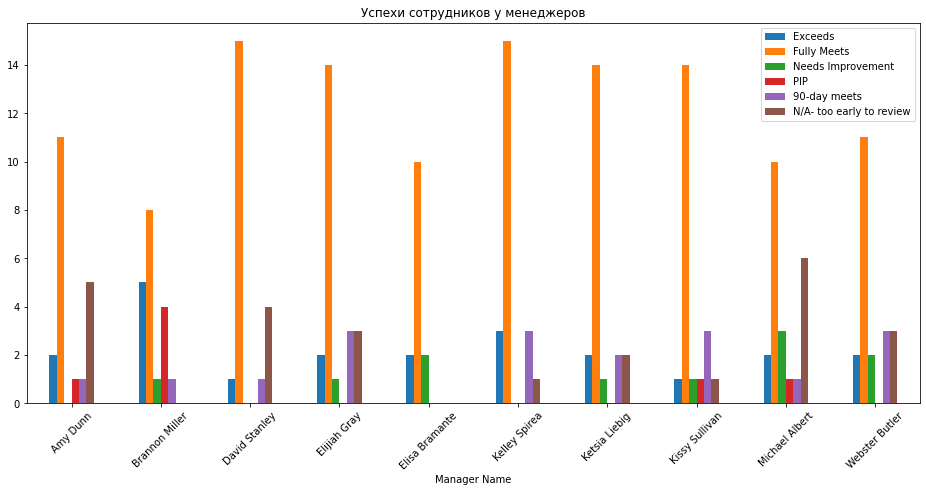

In [30]:
# Проверяем, каковы успехи сотрудников у менеджеров
sql_query = """
SELECT "Manager Name"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='Exceeds' and a."Manager Name"=b."Manager Name") AS "Exceeds"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='Fully Meets' and a."Manager Name"=b."Manager Name") AS "Fully Meets"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='Needs Improvement' and a."Manager Name"=b."Manager Name") AS "Needs Improvement"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='PIP' and a."Manager Name"=b."Manager Name") AS "PIP"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='90-day meets' and a."Manager Name"=b."Manager Name") AS "90-day meets"
	,(SELECT count(*) FROM production_staff b WHERE "Performance Score"='N/A- too early to review' and a."Manager Name"=b."Manager Name") AS "N/A- too early to review"
FROM production_staff a
GROUP BY "Manager Name"
ORDER BY "Manager Name";
"""
df_manager_stuff_ratings = pd.read_sql_query(sql_query, conn, ).dropna().set_index('Manager Name')
print(df_manager_stuff_ratings.to_string()) # Отладочная информация
df_manager_stuff_ratings.plot.bar(by='Manager Name', figsize=(16, 7), rot=45, title='Успехи сотрудников у менеджеров');

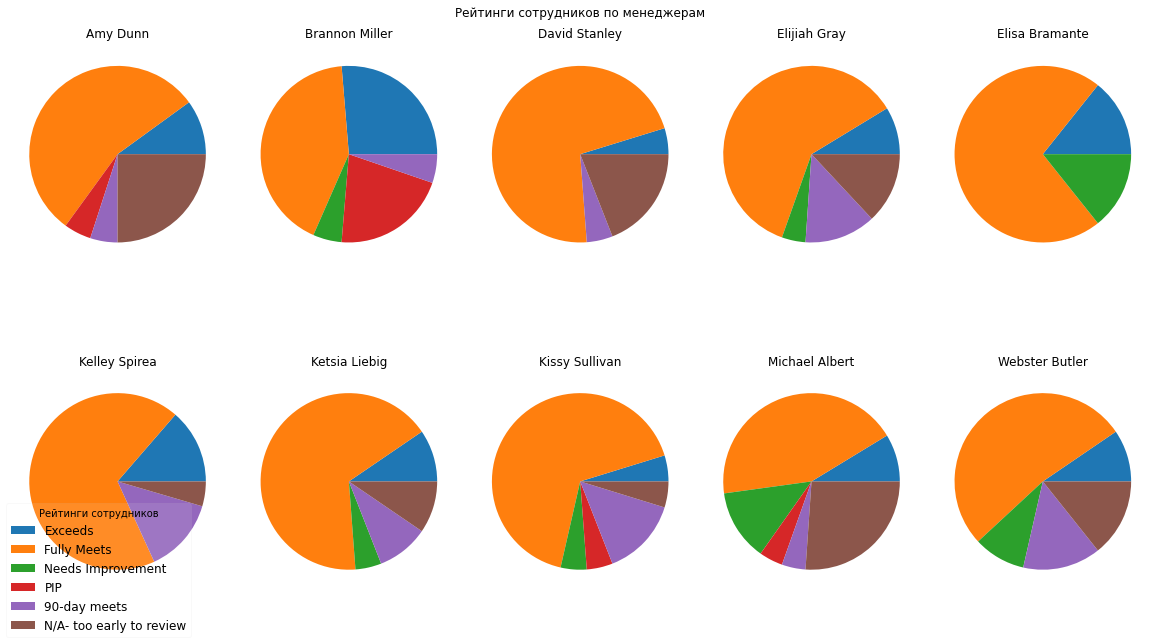

In [31]:
fig = plt.figure(figsize=(16, 9), facecolor='white', constrained_layout=True)
fig.suptitle('Рейтинги сотрудников по менеджерам')
# print(df_manager_stuff_ratings.index)
for i, manager in enumerate(df_manager_stuff_ratings.index):
    sp = fig.add_subplot(2, 5, i+1)
    ds_sp = df_manager_stuff_ratings.loc[manager]
    #print(manager, ds_sp.to_string())
    sp.set(title=manager, xlabel='', ylabel='')
    sp.pie(ds_sp)
fig.legend(df_manager_stuff_ratings.columns, title='Рейтинги сотрудников', framealpha=0.1, loc='lower left', fontsize='large');

Глядя на круговые диаграммы, можно сделать вывод о том, что у разных руководителей продуктивность сотрудников различна.

### Гипотеза о зависимости между продолжительностью работы в компании и семейным положением сотрудника.

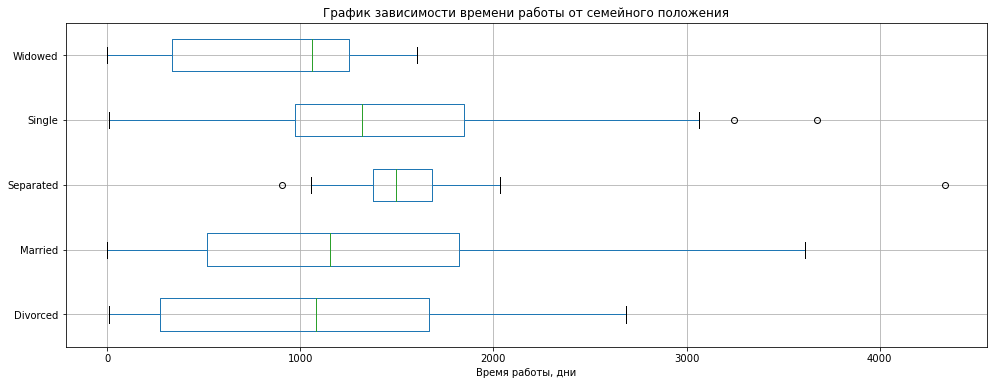

In [32]:
sql_query="""
SELECT maritaldesc, "Days Employed"
FROM hr_dataset
"""
pd.read_sql_query(sql_query, conn).boxplot(by='maritaldesc', vert=False, figsize=(16, 6)).set(xlabel='Время работы, дни', 
                                                                  title='График зависимости времени работы от семейного положения')
plt.suptitle('');

Из данного графика можно сделать вывод, что в среднем, дольше всего работают одинокие и отдельно живущие сотрудники. Меньше всего работают вдовцы.

### Гипотеза о зависимости между продолжительностью работы в компании и возрастом сотрудника.

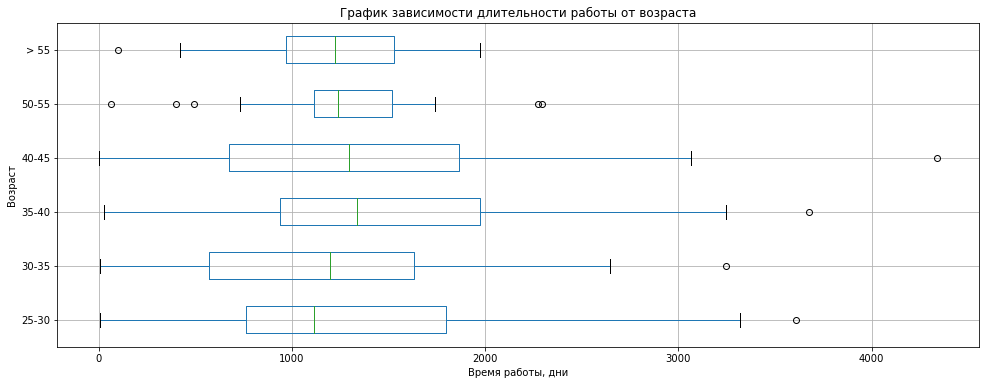

In [33]:
sql_query="""
SELECT CASE WHEN age < 25 THEN '< 25'
            WHEN age BETWEEN 25 AND 30 THEN '25-30' 
            WHEN age BETWEEN 30 AND 35 THEN '30-35'
            WHEN age BETWEEN 35 AND 40 THEN '35-40'
            WHEN age BETWEEN 40 AND 50 THEN '40-45'
            WHEN age BETWEEN 45 AND 50 THEN '45-50'
            WHEN age BETWEEN 50 AND 55 THEN '50-55'
            WHEN age >55 THEN '> 55'
       END AS age, 
	   "Days Employed"
FROM hr_dataset
"""
pd.read_sql_query(sql_query, conn).boxplot(by='age', vert=False, figsize=(16, 6)).set(xlabel='Время работы, дни', ylabel='Возраст',
                                                          title='График зависимости длительности работы от возраста')
plt.suptitle('');

На основании графика можно сделать вывод, что длительность работы статистически мало зависит от возраста сотрудника.

### Гипотеза о зависимости между доходом и возрастом

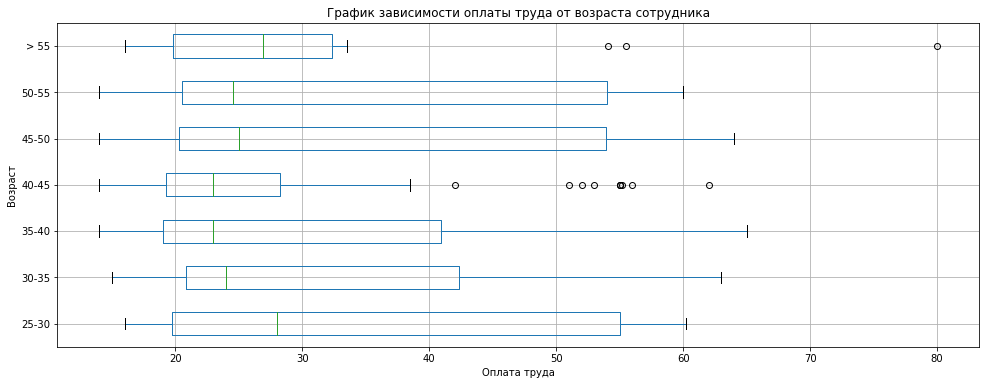

In [34]:
sql_query="""
SELECT CASE WHEN age < 25 THEN '< 25'
            WHEN age >= 25 AND age < 30 THEN '25-30' 
            WHEN age >= 30 AND age < 35 THEN '30-35'
            WHEN age >= 35 AND age < 40 THEN '35-40'
            WHEN age >= 40 AND age < 45 THEN '40-45'
            WHEN age >= 45 AND age < 50 THEN '45-50'
            WHEN age >= 50 AND age < 55 THEN '50-55'
            WHEN age >55 THEN '> 55'
       END AS age 
	   ,"Pay Rate"
FROM hr_dataset
"""
pd.read_sql_query(sql_query, conn).boxplot(by='age', vert=False, figsize=(16, 6)).set(xlabel='Оплата труда', ylabel='Возраст',
                                                          title='График зависимости оплаты труда от возраста сотрудника')
plt.suptitle('');

На основании графика можно сделать вывод, что видимой зависимостью между средней оплатой туда и возрастом нету.

### Гипотеза о зависимости между доходом и семейным положением

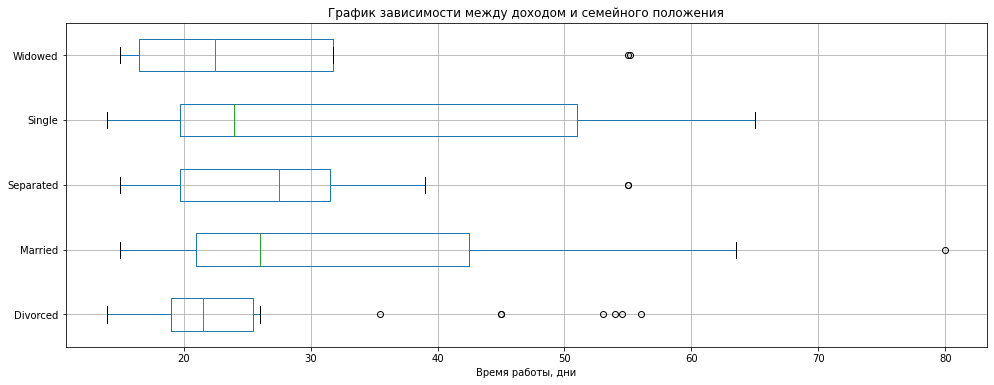

In [35]:
sql_query="""
SELECT maritaldesc, "Pay Rate"
FROM hr_dataset
"""
pd.read_sql_query(sql_query, conn).boxplot(by='maritaldesc', vert=False, figsize=(16, 6)).set(xlabel='Время работы, дни', 
                                                                  title='График зависимости между доходом и семейного положения')
plt.suptitle('');

Глядя на график можно сделать следующие выводы:
* Наибольший средний доход у живущих отдельно, за ними семейные и одинокие.
* Если рассматривать доходы верхней квантили, до больше зарабатывают живущие отдельно и семейные
* Хуже всего с зарплатой у разведенных

### Гипотеза - есть разница в успехах граждан и неграждан страны

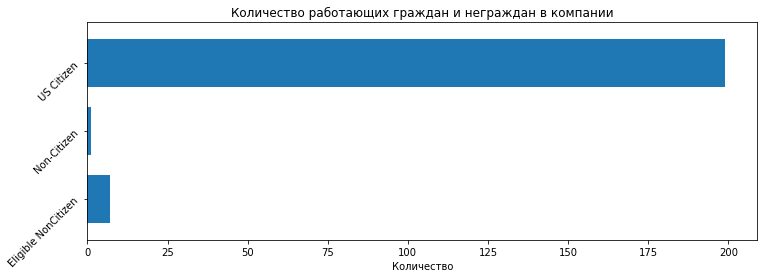

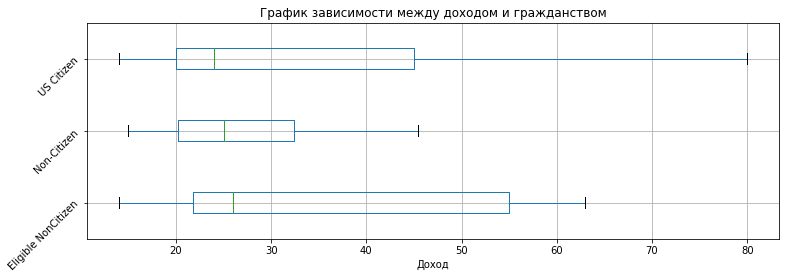

In [36]:
# График количества работающих граждан и неграждан в компании
sql_query = """
SELECT citizendesc, count(citizendesc)
FROM hr_dataset
WHERE "Date of Termination" is null
GROUP BY citizendesc
ORDER BY citizendesc
"""
pd.read_sql_query(sql_query, conn, index_col='citizendesc').plot.barh(title='Количество работающих граждан и неграждан в компании',
                         figsize=(12, 4), rot=45, width=0.7, legend=False).set(xlabel='Количество', ylabel='')

# График зависимости между доходом и гражданством
sql_query = """
SELECT "Pay Rate", citizendesc
FROM hr_dataset
"""
pd.read_sql_query(sql_query, conn, index_col='citizendesc').boxplot(by='citizendesc', vert=False, figsize=(12, 4), rot=45
                                            ).set(xlabel='Доход', ylabel='', title='График зависимости между доходом и гражданством')
plt.suptitle('');

Всего неграждан в компании порядка 5%. Средний доход по разным категориям гражданства близок. Но высокооплачиваемых сотрудников больше из 'Eliglible NonCitizen', а меньше из 'Non-Citizen'

### Гипотеза - частота ошибок рабочих зависит от расы

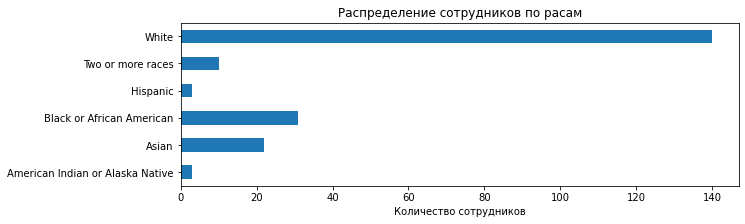

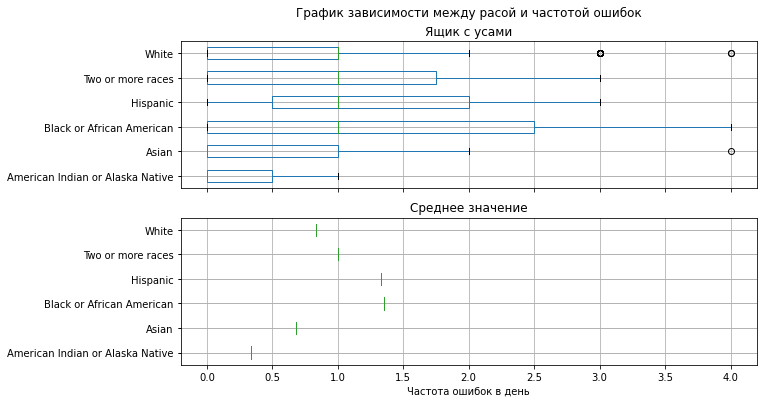

In [37]:
# График распределения сотрудников по расом
sql_query="""
SELECT "Race Desc", count("Race Desc")
FROM production_staff
GROUP BY "Race Desc"
ORDER BY "Race Desc"
"""
pd.read_sql_query(sql_query, conn,).dropna().set_index('Race Desc').plot.barh(figsize=(10, 3), title='Распределение сотрудников по расам', legend=False
                                                                             ).set(xlabel='Количество сотрудников', ylabel='')

# Графики статистики ошибок по расам
sql_query="""
SELECT "Race Desc", "Daily Error Rate"
	,avg("Daily Error Rate") OVER (PARTITION BY "Race Desc")
FROM production_staff
ORDER BY "Race Desc"
"""
df_races_errors = pd.read_sql_query(sql_query, conn)
ax = df_races_errors.boxplot(by='Race Desc', column=['Daily Error Rate', 'avg'], vert=False, figsize=(10, 6), layout=(2, 1))
ax[0].set(xlabel='Частота ошибок в день', title='Ящик с усами')
ax[1].set(xlabel='Частота ошибок в день', title='Среднее значение')
plt.suptitle('График зависимости между расой и частотой ошибок');
# df_races_errors.plot.barh(title='Количество работающих граждан и неграждан в компании',
#                          figsize=(12, 4), rot=45, width=0.7, legend=False).set(xlabel='Количество', ylabel='')

Можно сделать вывод, что зависимость частоты ошибок от расы имеется.
* Самые аккуратные - индейцы, азиаты, за ними белые
* Самые неаккуратые - негры

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

### Загрузка данных из VK

In [38]:
### YOUR CODE HERE ###
# В процессе
import vk_api

my_password = !cat vk_password.txt
my_password = my_password[0]
# print(my_password)

vk_session = vk_api.VkApi('ddmitry@gmail.com', my_password)
vk_session.auth()

vk = vk_session.get_api()

# print(vk.wall.post(message='Hello world!'))

In [39]:
tools = vk_api.VkTools(vk_session)

# Путем исследования группы был получен ее id: -66669811

# Грузим все имеющиеся данные. Чем большье выборка, тем статистически более достоверные данные можем получить.

wall = tools.get_all('wall.get', 100, {'owner_id': -66669811})

In [40]:
print('Posts count:', wall['count'])

# if wall['count']:
#     print('First post:', wall['items'][0], '\n')

# if wall['count'] > 1:
#     print('Last post:', wall['items'][-1])

Posts count: 7749


### Подготовка загруженных данных

In [41]:
import json
from pandas.io.json import json_normalize

df_wall = json_normalize(wall['items'])
df_wall.set_index('id', inplace=True)
df_wall['date'] = pd.to_datetime(df_wall['date'], unit='s')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [42]:
print('Размер:', df_wall.shape)
df_wall.head()

Размер: (7749, 24)


,from_id,owner_id,date,marked_as_ads,post_type,text,attachments,is_favorite,post_source.type,comments.count,...,likes.can_like,likes.can_publish,reposts.count,reposts.user_reposted,views.count,post_source.platform,copy_history,signer_id,post_source.url,post_source.data
id,,,,,,,,,,,,,,,,,,,,,
75778,-66669811,-66669811,2020-06-22 11:00:38,0,post,САНКТ-\nПЕТЕР\nБУРГ\n\nЕще не забыли логотип к...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,api,0,...,1,1,0,0,4466.0,NaN,NaN,NaN,NaN,NaN
75724,-66669811,-66669811,2020-06-22 09:05:24,0,post,"За окном жара, и хочется чего угодно, только н...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,api,7,...,1,1,1,0,5953.0,NaN,NaN,NaN,NaN,NaN
75556,-66669811,-66669811,2020-06-21 11:00:29,0,post,"Друзья, у нас стартует совместный проект с изд...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,api,8,...,1,1,2,0,11404.0,NaN,NaN,NaN,NaN,NaN
75405,-66669811,-66669811,2020-06-21 08:01:07,0,post,Какая ваша любимая асана для учебы или работы?...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,api,14,...,1,1,18,0,21073.0,NaN,NaN,NaN,NaN,NaN
75303,-66669811,-66669811,2020-06-20 13:19:13,0,post,"Как выглядит интерьер вашей мечты?\n\nДумаем, ...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,api,3,...,1,1,2,0,17612.0,NaN,NaN,NaN,NaN,NaN


In [43]:
print(f'Столбцы:\n{df_wall.columns}')

Столбцы:
Index(['from_id', 'owner_id', 'date', 'marked_as_ads', 'post_type', 'text',
       'attachments', 'is_favorite', 'post_source.type', 'comments.count',
       'comments.can_post', 'comments.groups_can_post', 'likes.count',
       'likes.user_likes', 'likes.can_like', 'likes.can_publish',
       'reposts.count', 'reposts.user_reposted', 'views.count',
       'post_source.platform', 'copy_history', 'signer_id', 'post_source.url',
       'post_source.data'],
      dtype='object')


In [44]:
df_wall.loc[52057,'text']

'Не хватает 24 часов в сутках и 365 дней в году для реализации своих планов?\n\n29 февраля можно по праву считать календарным кэшбеком, который возвращает часть потерянного времени. Воспользуйтесь им с умом — осуществите то, о чем давно мечтали: встретьтесь со старыми друзьями, прочитайте книгу из своего списка, сходите на лекцию. Или начните осваивать новую профессию, а мы вам в этом поможем.\n\nИ почему бы нам в такой необычный день не провести конкурс? В самом деле! Приз — любой курс Skillbox.\n\nПравила просты:\n★ сделайте репост этого поста;\n★ откройте свой аккаунт — так мы увидим, что вы участвуете.\n★ ждите результатов конкурса!\n\nПобедителя определим случайным образом и подарим ему сертификат на курс Skillbox. \n\nЖелаем удачи!\n\n#Конкурс_Skillbox'

In [45]:
# df_wall.to_csv('compute/df_wall.csv', encoding='utf8') # Резервная копия датасета

### Анализ полученных данных

#### Общая статистика

In [46]:
# Группировка информации понедельно
# weekly = df_wall[['date','likes.count', 'reposts.count', 'views.count']].set_index('date').resample('W').sum()
weekly = df_wall[['date','likes.count', 'reposts.count', 'views.count']].set_index('date').resample('W').agg('mean')
weekly.columns = ['likes', 'reposts', 'views']

# Коэффициент вовлеченности пользователей (engagement rate)
weekly['ER'] = weekly['likes'] / weekly['views'] * 100
weekly = np.round(weekly, 2)
weekly

,likes,reposts,views,ER
date,,,,
2015-07-26,3.82,0.18,NaN,NaN
2015-08-02,2.95,0.04,NaN,NaN
2015-08-09,1.92,0.11,NaN,NaN
2015-08-16,1.79,0.24,NaN,NaN
2015-08-23,2.49,0.25,NaN,NaN
...,...,...,...,...
2020-05-31,121.11,14.56,26696.56,0.45
2020-06-07,76.00,7.46,23370.46,0.33
2020-06-14,71.27,5.27,22487.91,0.32


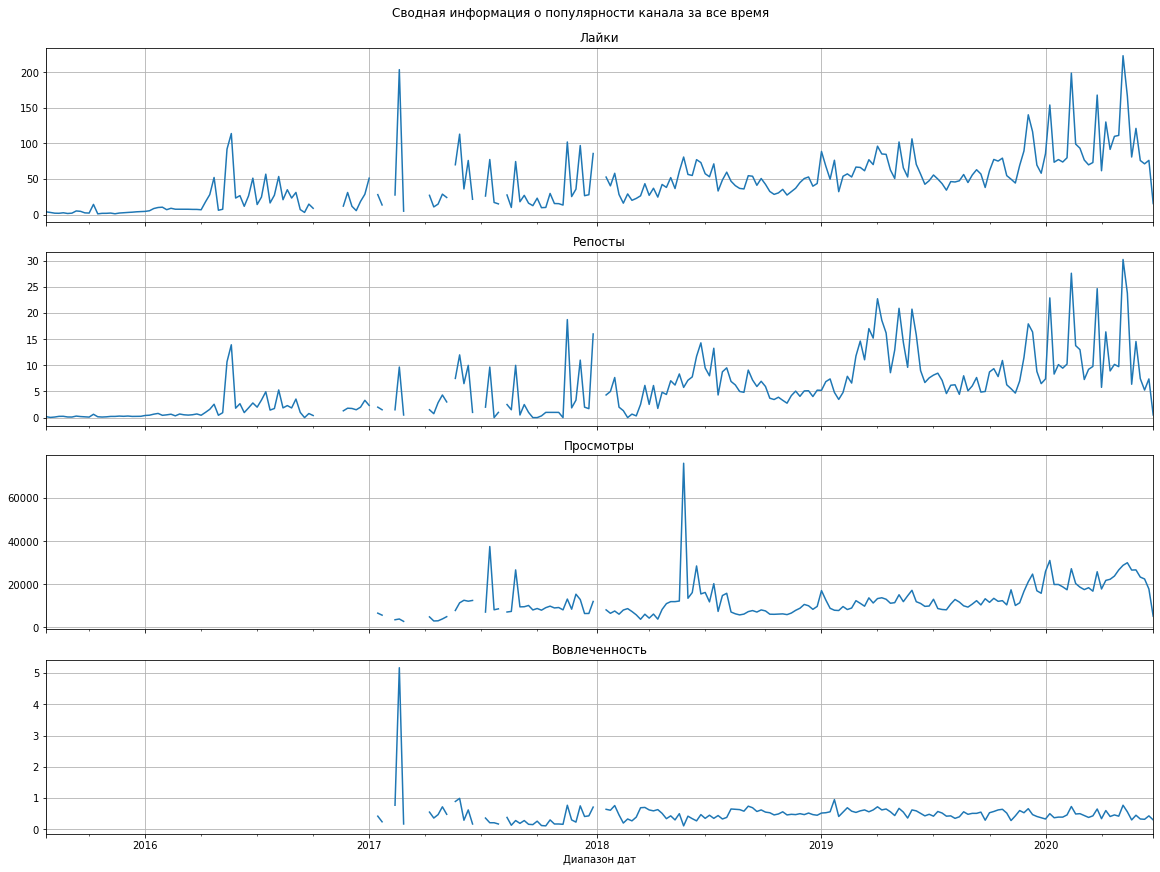

In [47]:
# Сводная информация о популярности канала за все время

fig, ax = plt.subplots(4, 1, figsize=(16, 12), constrained_layout=True)
weekly.plot(ax=ax[0], y='likes', title='Лайки', legend=False, grid=True, sharex=True)
weekly.plot(ax=ax[1], y='reposts', title='Репосты', legend=False, grid=True, sharex=True)
weekly.plot(ax=ax[2], y='views', title='Просмотры', legend=False, grid=True, sharex=True)
weekly.plot(ax=ax[3], y='ER', title='Вовлеченность', legend=False, grid=True, sharex=True).set(xlabel='Диапазон дат');
plt.suptitle('Сводная информация о популярности канала за все время');

За 2017 год график популярности относительно ровыный, с периодическими всплесками. В 2018 году летом виден рост популярности. С очень большим пиком в июне 2018. Далее таки всплесков просмотров не было.
В 2019 году виден всплеск активности (лайки, репосты, посещаемость) весной, со спадом летом. Дальше снова всвплеск, но только по критериям (лайки, репосты). Посещаемость же стабильна.
Можно отметить, что аудитория канала увеличивается по весну 2019 года. Дальше визуально заметного роста не наблюдается

In [48]:
# Группировка критериев популярности подневно
# daily = df_wall[['date', 'likes.count', 'reposts.count', 'views.count']].set_index('date').resample('D').sum()
daily = df_wall[['date', 'likes.count', 'reposts.count', 'views.count']].set_index('date').resample('D').agg('mean')
daily.columns = ['likes', 'reposts', 'views']
# daily.head()

                likes    reposts         views    ER
date                                                
2015-07-24   3.258065   0.225806           NaN   NaN
2015-07-25   4.200000   0.200000           NaN   NaN
2015-07-26   5.200000   0.000000           NaN   NaN
2015-07-27   2.400000   0.000000           NaN   NaN
2015-07-28   3.800000   0.000000           NaN   NaN
...               ...        ...           ...   ...
2020-06-18  93.666667  11.333333  17153.666667  0.55
2020-06-19  36.333333   2.000000  15387.333333  0.24
2020-06-20  94.000000   2.000000  17612.000000  0.53
2020-06-21  69.000000  10.000000  16238.500000  0.42
2020-06-22  15.500000   0.500000   5209.500000  0.30

[1796 rows x 4 columns]


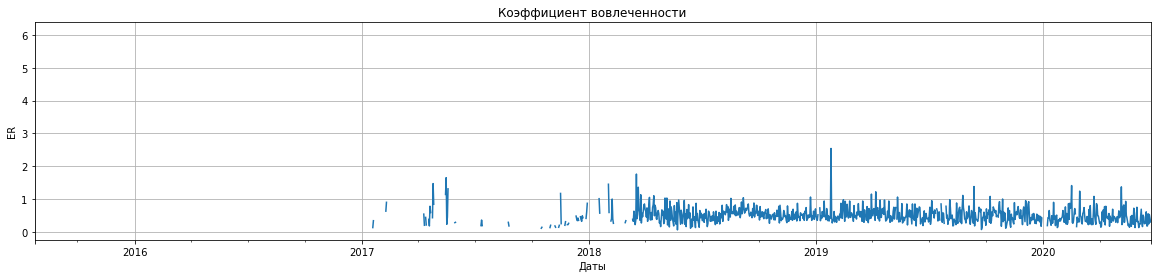

In [49]:
# Анализ коэффициента вовлеченности пользователей (engagement rate) вовлеченности пользователей

daily['ER'] = np.round(daily['likes'] / daily['views'] * 100, 2)
print(daily)
daily['ER'].plot(figsize=(20, 4), grid=True, title='Коэффициент вовлеченности').set(xlabel='Даты', ylabel='ER');

Похоже, Skillbox не брезговал никакими методами раскрутки группы в 2016 и 2017 годах. 101 лайк при 0 просмотров в реальной жизни не бывает ) Либо, платформа VK за те годы не давала такую статистику. Хотя, наличие в 2017 году кусков данных вперемешку и со статистикой, и без, делают первый вариант вероятнее.
Вне зависимости от причин, анализировать данные ранее 2018 года смысла нет.

#### Гипотеза - день недели публикации влияет на популярность

In [50]:
# Делаю выборку из массива данных, начиная с 2018 года. Ранее, как показал предыдущий анализ, смысла смотреть нету
# Интересуют столбцы с числовыми метриками, текстом, и сохраняю id записей

# Диапаазон дат обрабатываемых данных
from_date = pd.to_datetime('2018-03-01'); 
to_date = pd.to_datetime('2020-03-01')

# Получение данных за выбранный период из оновного датасета. Интересуют числоые харктеристики, id записей и текст
# df_wall2018_date = df_wall.set_index('date')
df_wall2018_date = df_wall.reset_index().set_index('date')
# print(df_wall2018_date.columns)
df_wall2018 = df_wall2018_date[(df_wall2018_date.index>=from_date)&
                               (df_wall2018_date.index<to_date)
                              ][['id', 'likes.count', 'reposts.count', 'views.count', 'text']]
df_wall2018.rename(columns={'likes.count':'likes', 'reposts.count':'reposts', 'views.count':'views'}, inplace=True)
# Считаем конверсию
df_wall2018['ER'] = np.round(df_wall2018['likes'] / df_wall2018['views'] * 100, 2)
df_wall2018

,id,likes,reposts,views,text,ER
date,,,,,,
2020-02-29 08:39:51,52057,433,79,34975.0,Не хватает 24 часов в сутках и 365 дней в году...,1.24
2020-02-28 16:50:53,52054,70,16,14912.0,"Как нарисовать персонажа в движении, не разбир...",0.47
2020-02-28 11:34:35,52053,15,1,13041.0,Встречайте 5 новых спикеров OFFF Moscow 2020. ...,0.12
2020-02-27 14:59:25,52043,43,5,11380.0,Открытие бьюти салона. Ожидание: арендовали ме...,0.38
2020-02-27 12:20:57,52041,81,2,20197.0,"Что общего между йогой и дизайном? И там, и зд...",0.40
...,...,...,...,...,...,...
2018-03-12 10:22:31,22596,14,1,3730.0,Привет!\nЛовите календарь новой недели. Выбира...,0.38
2018-03-07 10:00:52,22586,22,0,4820.0,"Мы не можем обойтись без музыки, и поэтому пер...",0.46
2018-03-05 14:23:45,22581,30,0,7018.0,3 марта 2018 года в офисе Skillbox прошло меро...,0.43


     likes  reposts     views  records    ER
Пн   49.80     7.05  10491.28      361  0.49
Вт   40.99     5.61   9533.65      344  0.45
Ср   56.43     7.87  16697.60      336  0.50
Чт   47.42     6.80  10754.61      352  0.47
Пт   62.47     9.20  11080.69      367  0.59
Сб   60.08     7.97  12866.74      190  0.47
Вс  114.47    18.96  16367.25      158  0.65


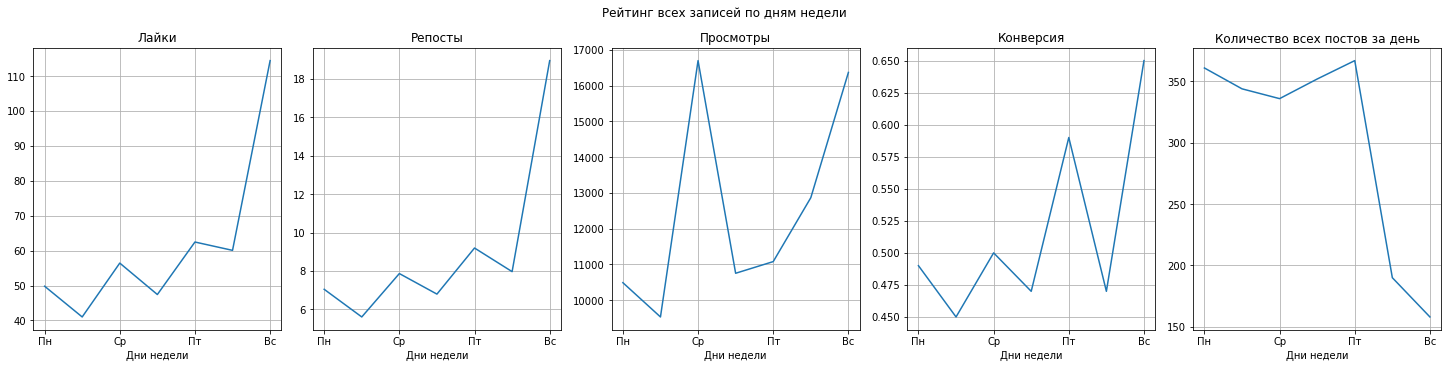

In [51]:
# Строим статистику просмотров по дням неделели, за 2018-2019 года

# by_weekday = df_wall2018[['likes', 'reposts', 'views', 'ER']].groupby(df_wall2018.index.dayofweek).mean()
by_weekday = df_wall2018.groupby(df_wall2018.index.dayofweek).agg(
    {'likes':'mean', 'reposts':'mean', 'views':['mean', 'count'], 'ER':'mean'})
by_weekday.columns = ['likes', 'reposts', 'views', 'records', 'ER']
by_weekday.index = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
by_weekday = np.round(by_weekday, 2)
print(by_weekday)

fig, ax = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)
fig.suptitle('Рейтинг всех записей по дням недели');
by_weekday.plot(ax=ax[0], y='likes', title='Лайки', legend=False, sharex=True, grid=True).set(
    xlabel='Дни недели', ylabel='');
by_weekday.plot(ax=ax[1], y='reposts', title='Репосты', legend=False, grid=True).set(xlabel='Дни недели');
by_weekday.plot(ax=ax[2], y='views', title='Просмотры', legend=False, grid=True).set(xlabel='Дни недели');
by_weekday.plot(ax=ax[3], y='ER', title='Конверсия', legend=False, grid=True).set(xlabel='Дни недели');
by_weekday.plot(ax=ax[4], y='records', title='Количество всех постов за день', legend=False, grid=True).set(xlabel='Дни недели');

По графикам можно сделать следующие выводы: 
* Количество просмотров стены больше в среду и воскресенье.
* Максимум лайков и репостов в воскресенье. Минимум же и просмотров, и лайков во вторние.  
* Коэффициент конверсии колеблется в интервале от 0.45 до 0.65, с максимумом в пятницу и воскресенье.  
Можно сделать вывод, что наилучший день недели для популярного поста - воскресенье. Но в воскресенье же минимум постов (150)

**Рекомендация организаторам: наилучший день недели для публикации - воскресенье**


#### Гипотеза - время суток публикации влияет на популярность

      likes  reposts     views  records    ER
date                                         
5     73.00    11.00  18011.00        1  0.41
6     42.56     4.56  11165.56        9  0.38
7     59.85    12.02  11675.18      242  0.43
8     68.33     8.81  13973.92       95  0.47
9     78.21    10.50  14460.17      151  0.52
10    79.68     7.11  12080.72      117  0.66
11    44.31     4.37  11209.07       68  0.44
12    54.36     7.32  11865.24      417  0.56
13    63.51     5.84  38088.44       63  0.46
14    59.00    11.08  11619.60      357  0.54
15    57.98     8.59  12230.99       91  0.50
16    48.26     6.28   9031.66      324  0.50
17    58.43     8.94  10874.03       35  0.50
18    28.21     2.84   7324.07      129  0.39
19    29.75     1.38   7843.50        8  0.38
20    15.00     2.00   6707.00        1  0.22
2108 2108


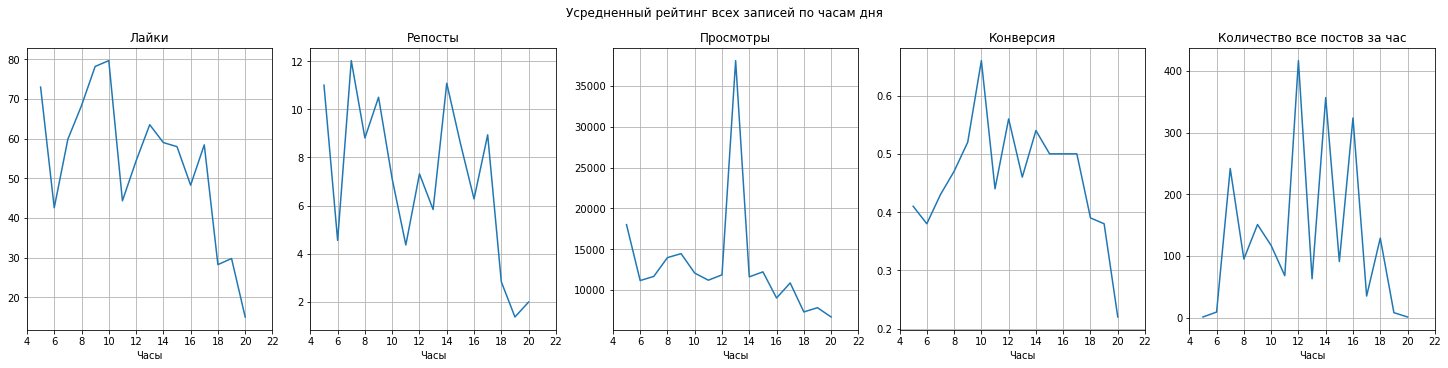

In [52]:
# Строю почасовую группировку данных, с 2018 года
# by_hours = df_wall2018.groupby(df_wall2018.index.hour)['likes', 'reposts', 'views', 'ER'].mean()
by_hours = df_wall2018.groupby(df_wall2018.index.hour).agg(
    {'likes':'mean', 'reposts':'mean', 'views':['mean', 'count'], 'ER':'mean'})
by_hours.columns = ['likes', 'reposts', 'views', 'records', 'ER']
by_hours = np.round(by_hours, 2)
print(by_hours)
print(by_hours['records'].sum(), df_wall2018.shape[0])

hours_ticks = list(range(4, 23, 2))
# График с рейтингом всех записей по часам дня
fig, ax = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)
by_hours.plot(ax=ax[0], y='likes', title='Лайки', legend=False, grid=True).set(
    xlabel='Часы', xticks=hours_ticks);
by_hours.plot(ax=ax[1], y='reposts', title='Репосты', legend=False, grid=True).set(
    xlabel='Часы', xticks=hours_ticks);
by_hours.plot(ax=ax[2], y='views', title='Просмотры', legend=False, grid=True).set(
    xlabel='Часы', xticks=hours_ticks);
by_hours.plot(ax=ax[3], y='ER', title='Конверсия', legend=False, grid=True).set(
    xlabel='Часы', xticks=hours_ticks);
by_hours.plot(ax=ax[4], y='records', title='Количество все постов за час', legend=False, grid=True).set(
    xlabel='Часы', xticks=hours_ticks);
plt.suptitle('Усредненный рейтинг всех записей по часам дня');

По графикам можно сделать следующие выводы:
* Максимум просмотров собирают посты, написанные в 13 часов
* Для постов отправленных в 10 утра конверсия максимальна. В 12 и 14 часов - чуть хуже. После 18 часов - минимальна
* Реакция на посты (лайки и репосты) после 18 часов падает до минимуму
* Больше всего постов опубликовано в 12 и 14 часов. И более чем в 4 раза во время максимальной просматриваемости - 13 часов
* Посты опубликованные восле 18 вечера почти никто не смотрит

**Рекомендаци организаторам: наилучшее время для публикации - 13 часов**

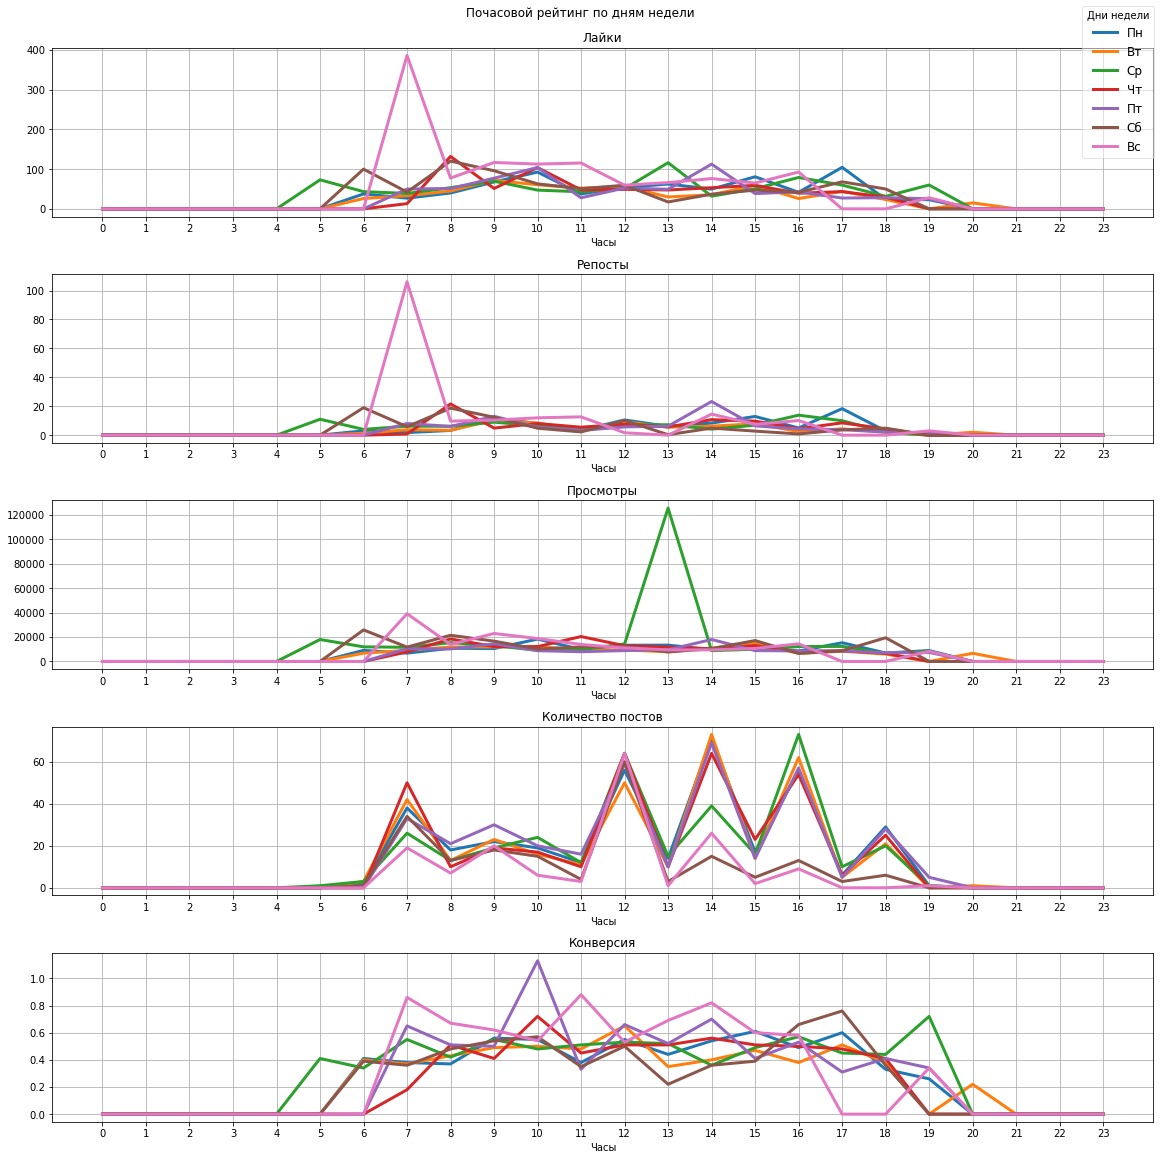

In [53]:
# Строю группировку по днями недели и часам
# by_dayofweek_and_hours = df_wall2018[['likes', 'reposts', 'views']].groupby(
#     [df_wall2018.index.dayofweek, df_wall2018.index.hour] ).mean()
# by_dayofweek_and_hours.index.names = ['dayofweek', 'hour']

by_dayofweek_and_hours = df_wall2018.groupby([df_wall2018.index.dayofweek, df_wall2018.index.hour]).agg(
    {'likes':'mean', 'reposts':'mean', 'views':['mean', 'count'], 'ER':'mean'})
by_dayofweek_and_hours.columns = ['likes', 'reposts', 'views', 'records', 'ER']
by_dayofweek_and_hours.index.names = ['dayofweek', 'hour']

by_dayofweek_and_hours = np.round(by_dayofweek_and_hours, 2)
# print(f'Группировка критериев по дням недели и часам:\n{by_dayofweek_and_hours}\nВидим что индексы не выравнены')

weekdays_num = list(range(7)) # номера дней недели
hours_num = list(range(24)) # часы в сутках

# Выравниваю индекс
by_dayofweek_and_hours = by_dayofweek_and_hours.reindex(
    pd.MultiIndex.from_product([weekdays_num, hours_num], names=['dayofweek', 'hour'])
    ).fillna(0)
# print(f'\nВыровняли индекс:\n{by_dayofweek_and_hours.head(9)}');

# Отрисовываю полученную группировку в виде почасового рейтинга по дням недели
weekdays = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
titles = ['Лайки', 'Репосты', 'Просмотры', 'Количество постов', 'Конверсия']
fig, sp = plt.subplots(5,1, figsize=(16, 16), constrained_layout=True)
fig.suptitle('Почасовой рейтинг по дням недели')
for i, column in enumerate(by_dayofweek_and_hours.columns):
    for j in weekdays_num:
        sp[i].plot(by_dayofweek_and_hours.index.levels[1], by_dayofweek_and_hours.loc[(j), column], linewidth=3)
        sp[i].set(title=titles[i], xlabel='Часы', ylabel='', xticks=hours_num)
        sp[i].grid()
fig.legend(weekdays, title='Дни недели', fontsize='large', framealpha=0.5);

По графикам можно сделать следующие выводы:
* На фоне других дней недели, видно что посты, написанные в интервале с 6 до 8 утра воскресенья, лайкают намного чаще, чем в другое время.
* Максимум просмотров собирают посты, опубликованные в 13 часов субботы. Отрыв в 7 раз от других временных диапазонов
* Максимальной конверсии посты достигают в понедельник 10 утра. Также, конверсия воскресных постов, практически все утро и день, довольно высокая

**Хочется порекомендовать организаторам обратить внимание на среду 13 часов. Путь в это время конверсия не на пике, только 0.5, но 7 кратное превышение от остального диапазона дает максимум отдачи**

#### Анализируем содержимое датасета глубже

In [54]:
# Анализ аномалий
print(f"Больше 300 лайков на пост:\n{df_wall2018[df_wall2018['likes']>300].to_string()}")
print(f"\nБольше 80 репостов на пост:\n{df_wall2018[df_wall2018['reposts']>80].to_string()}")
print(f"\nБольше 70 000 просмотров на пост:\n{df_wall2018[df_wall2018['views']>70000].to_string()}")

Больше 300 лайков на пост:
                        id  likes  reposts      views                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [55]:
# Смотрим детальнее, о чем пишут внутри самых просматриваемых постов
# for i, record in df_wall2018[df_wall2018['views']>70000].iterrows():
#     print(f"i={i}, likes={record['likes']}, reposts={record['reposts']}, views={int(record['views'])}, text:\n\"{record['text']}\"\n")

#### Классифицикация постов по категориям

In [57]:
import re
import pymorphy2

In [58]:
# Категории постов
skillbox_categories = ('Программирование','Дизайн', 'Маркетинг', 'Управление')
skillbox_cat_len = len(skillbox_categories)
# Ключевые слова для категоризирования
cat_words_programming = ['java', 'python', 'unity', 'data', 'scientist', 'frontend', 'fullstack', 'php', 'c++', 'devops'
                        , 'разработчик', 'тестировщик', 'кибербезопасность', 'javascript', 'react.js', 'vue.js', 'django', 'программа'
                        , 'программирование', 'skillbox_программирование', 'алгоритм', 'хакер', 'code', 'sql', 'разработка'
                        , 'приложение', 'приложение', 'архитектура', 'субд']
cat_words_design = ['дизайнер', 'графический', 'интерьер', 'художник', 'графика', 'интерьер', 'motion', 'designer', 'аниматор'
                   , 'спецэффект', 'дженералист', 'шрифт', 'арт', 'art', 'моушн', 'музыка', 'photoshop', 'sound', 'анимация', '3ds'
                   , 'ableton', 'скетчинг', 'adobe', 'логотип', 'стиль', 'figma', 'sketch', 'sketchup', 'макет', 'флористика', 'дизайн'
                   , 'фотошоп', '3d', 'иконка', 'скетчинг', 'скетчинга', 'креативность', 'творчество', 'skillbox_дизайн', 'design'
                   , 'designbattle', 'friday_typeface', 'ui', 'ux']
cat_words_marketing = ['маркетолог', 'smm', 'таргетолог', 'seo', 'бренд', 'аналитика', 'аудитория', 'анализ', 'контекст', 'копирайтинг'
                      , 'таргетинг', 'траффик', 'crm', 'pr', 'ingate', 'реклама', 'стратег', 'репутация', 'продвижение', 'prt', 'продвижение'
                      , 'маркетинг', 'instagram', 'блог', 'блогер', 'бренд', 'вовлеченность', 'продажа', 'конкурент', 'Skillbохмаркетинг'
                      , 'skillbox_маркетинг', ]
cat_words_management = ['руководитель', 'менеджер', 'управление', 'product', 'проект', 'менеджмент', 'выступление', 'презентация', 'продюсер'
                       , 'развитие', 'бизнес', 'excel', 'команда', 'powerpoint', 'финансы', 'финансовый', 'нефинансист', 'брифинг'
                       , 'дебрифинг']
cat_words = []
cat_words.append(cat_words_programming)
cat_words.append(cat_words_design)
cat_words.append(cat_words_marketing)
cat_words.append(cat_words_management)
for i , cat in enumerate(skillbox_categories):
    print(f'{cat}: {cat_words[i]}\n' )


Программирование: ['java', 'python', 'unity', 'data', 'scientist', 'frontend', 'fullstack', 'php', 'c++', 'devops', 'разработчик', 'тестировщик', 'кибербезопасность', 'javascript', 'react.js', 'vue.js', 'django', 'программа', 'программирование', 'skillbox_программирование', 'алгоритм', 'хакер', 'code', 'sql', 'разработка', 'приложение', 'приложение', 'архитектура', 'субд']

Дизайн: ['дизайнер', 'графический', 'интерьер', 'художник', 'графика', 'интерьер', 'motion', 'designer', 'аниматор', 'спецэффект', 'дженералист', 'шрифт', 'арт', 'art', 'моушн', 'музыка', 'photoshop', 'sound', 'анимация', '3ds', 'ableton', 'скетчинг', 'adobe', 'логотип', 'стиль', 'figma', 'sketch', 'sketchup', 'макет', 'флористика', 'дизайн', 'фотошоп', '3d', 'иконка', 'скетчинг', 'скетчинга', 'креативность', 'творчество', 'skillbox_дизайн', 'design', 'designbattle', 'friday_typeface', 'ui', 'ux']

Маркетинг: ['маркетолог', 'smm', 'таргетолог', 'seo', 'бренд', 'аналитика', 'аудитория', 'анализ', 'контекст', 'копирай

In [59]:
# df_wall2018

In [61]:
# Функции для категоризации текста
norm_regular_expr = r'\w+'
norm_reg_expr_compiled = re.compile(norm_regular_expr)
morph = pymorphy2.MorphAnalyzer()

def str_to_norm_words(raw_text):
    """Переводит полученный текс в список слов в нормальной форме"""
    raw_text_lower = raw_text.lower()
    # разбиваем текст на слова
    text_by_words = norm_reg_expr_compiled.findall(raw_text_lower) 
    # нормализуем каждое слово в тексте
    normalized_token_list = []
    for word in text_by_words:
        parsed_token = morph.parse(word)
        normal_form = parsed_token[0].normal_form
        normalized_token_list.append(normal_form)
    return normalized_token_list


def cat_by_words(word_list, debug_mode=False):
    """Возвращает список из категорий слов. Каждый элемент соответствует пункту списка 'skillbox_categories'"""
    res = [0, 0, 0, 0]
    for i in range(len(skillbox_categories)):
        for word in word_list:
            if word in cat_words[i]:
                res[i] += 1
                if debug_mode: print(f'{skillbox_categories[i]}: {word}')
    return res

def cat_by_text(text, debug_mode=False):
    """Возвращает список категорий принятого текста"""
    return cat_by_words(str_to_norm_words(text), debug_mode=debug_mode)

In [62]:
# Категоризация статей
%time df_wall2018['cat_list'] = df_wall2018['text'].apply(cat_by_text)

# Создаю отдельные столбцы с количеством слов каждой категории из столбца 'cat_list'
list_df2018 = np.array(list(df_wall2018['cat_list']))
for i in range(list_df2018.shape[1]):
    df_wall2018['cat'+str(i)] = list_df2018[:, i]
print('Категории слов:', skillbox_categories)
df_wall2018

CPU times: user 48.7 s, sys: 45.8 ms, total: 48.7 s
Wall time: 48.7 s
Категории слов: ('Программирование', 'Дизайн', 'Маркетинг', 'Управление')


,id,likes,reposts,views,text,ER,cat_list,cat0,cat1,cat2,cat3
date,,,,,,,,,,,
2020-02-29 08:39:51,52057,433,79,34975.0,Не хватает 24 часов в сутках и 365 дней в году...,1.24,"[0, 0, 0, 0]",0,0,0,0
2020-02-28 16:50:53,52054,70,16,14912.0,"Как нарисовать персонажа в движении, не разбир...",0.47,"[0, 3, 0, 0]",0,3,0,0
2020-02-28 11:34:35,52053,15,1,13041.0,Встречайте 5 новых спикеров OFFF Moscow 2020. ...,0.12,"[0, 7, 1, 3]",0,7,1,3
2020-02-27 14:59:25,52043,43,5,11380.0,Открытие бьюти салона. Ожидание: арендовали ме...,0.38,"[0, 0, 1, 2]",0,0,1,2
2020-02-27 12:20:57,52041,81,2,20197.0,"Что общего между йогой и дизайном? И там, и зд...",0.40,"[0, 5, 0, 1]",0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-12 10:22:31,22596,14,1,3730.0,Привет!\nЛовите календарь новой недели. Выбира...,0.38,"[0, 0, 0, 0]",0,0,0,0
2018-03-07 10:00:52,22586,22,0,4820.0,"Мы не можем обойтись без музыки, и поэтому пер...",0.46,"[0, 4, 0, 0]",0,4,0,0
2018-03-05 14:23:45,22581,30,0,7018.0,3 марта 2018 года в офисе Skillbox прошло меро...,0.43,"[0, 2, 1, 1]",0,2,1,1


In [63]:
# df_wall2018.drop('cat02', axis='columns', inplace=True)
# df_wall2018

Количество постов по категориям:
Программирование: 539
Дизайн: 882
Маркетинг: 581
Управление: 603
Разница между максимальным и минимальным количеством: 1.6


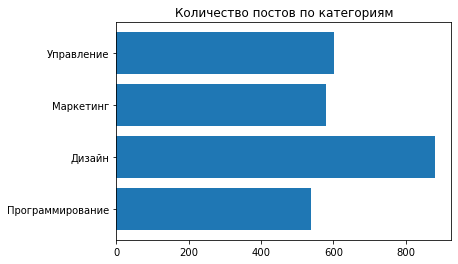

In [64]:
# Считаю количество постов по категориям
cat_numbers=[]
for i in range(len(skillbox_categories)):
    cat_numbers.append(df_wall2018[df_wall2018['cat'+str(i)]>0].shape[0])
print('Количество постов по категориям:')
for i in range(len(skillbox_categories)):
    print(f'{skillbox_categories[i]}: {cat_numbers[i]}')
print('Разница между максимальным и минимальным количеством:', np.round(max(cat_numbers)/min(cat_numbers), 1))
plt.barh(skillbox_categories, cat_numbers)
plt.title('Количество постов по категориям');

Больше всего публикаций на стене было посвящено дизайну, меньше всего программированию. Разница по колическтву между ними в 1.6 раза.

In [65]:
# Группировка информации понедельно
weekly2018 = weekly[weekly.index>='2018-03-01'].copy()
for i in range(skillbox_cat_len):
    si = str(i)
    weekly_cat = df_wall2018[df_wall2018['cat'+si]>0][['likes', 'reposts', 'views']].resample('W').agg('mean')
    weekly_cat.columns = ['likes'+si, 'reposts'+si, 'views'+si]
    weekly_cat['ER'+si] = weekly_cat['likes'+si] / weekly_cat['views'+si] * 100
    weekly_cat = np.round(weekly_cat, 2)
    weekly2018 = weekly2018.merge(weekly_cat, how='left', left_index=True, right_index=True)
weekly2018

,likes,reposts,views,ER,likes0,reposts0,views0,ER0,likes1,reposts1,views1,ER1,likes2,reposts2,views2,ER2,likes3,reposts3,views3,ER3
date,,,,,,,,,,,,,,,,,,,,
2018-03-04,20.00,0.67,7415.67,0.27,NaN,NaN,NaN,NaN,25.00,0.00,7377.00,0.34,NaN,NaN,NaN,NaN,25.0,0.00,7377.00,0.34
2018-03-11,22.67,0.33,5865.67,0.39,NaN,NaN,NaN,NaN,26.00,0.00,5919.00,0.44,30.0,0.00,7018.0,0.43,30.0,0.00,7018.00,0.43
2018-03-18,26.35,2.53,3806.18,0.69,9.25,0.75,2794.0,0.33,35.80,4.40,3667.20,0.98,46.0,5.33,4337.0,1.06,32.0,4.00,3712.83,0.86
2018-03-25,43.37,6.16,6152.42,0.70,10.00,0.00,4007.0,0.25,36.50,4.88,4360.38,0.84,87.0,22.00,14672.0,0.59,26.5,3.25,3793.00,0.70
2018-04-01,27.00,2.53,4340.84,0.62,45.33,5.67,4517.0,1.00,21.75,2.75,3986.00,0.55,24.0,4.25,3909.5,0.61,20.0,2.33,3561.00,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,121.11,14.56,26696.56,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07,76.00,7.46,23370.46,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14,71.27,5.27,22487.91,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


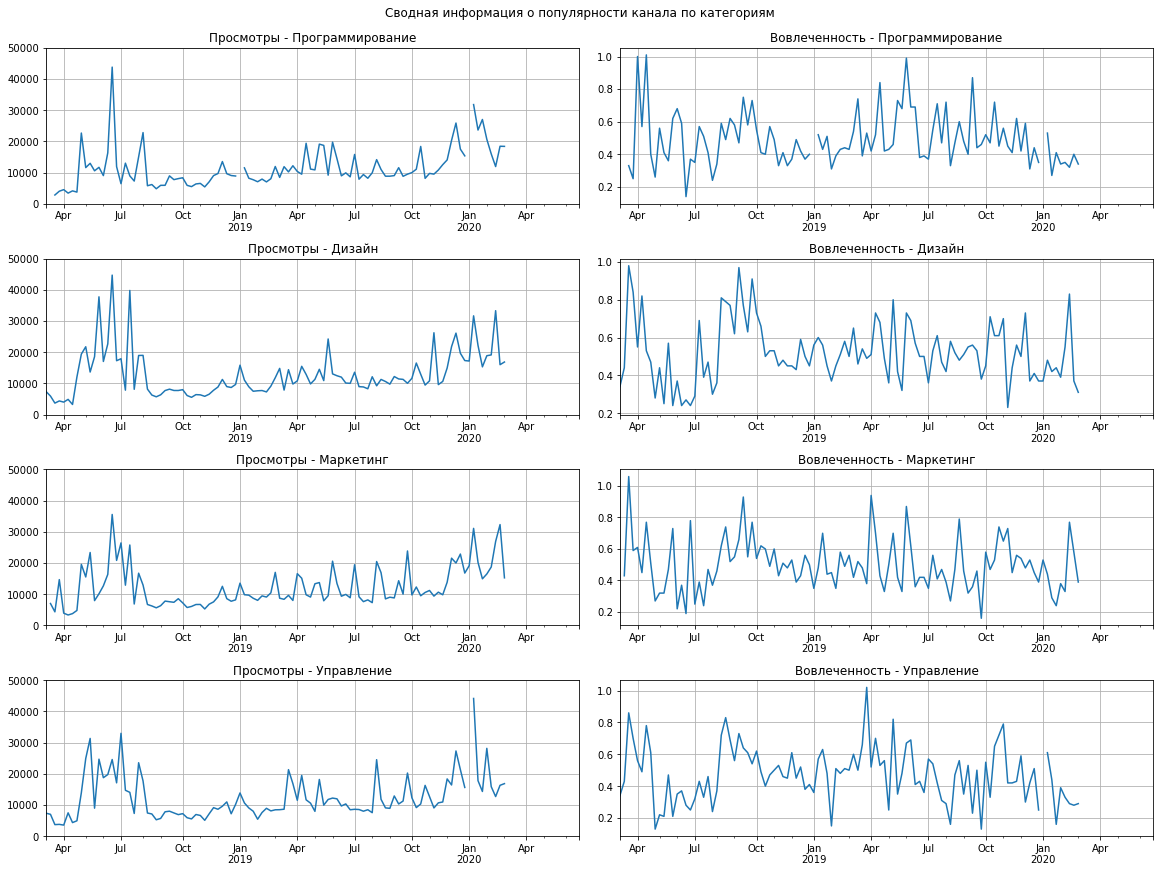

In [66]:
fig, ax = plt.subplots(skillbox_cat_len, 2, figsize=(16, 12), constrained_layout=True)
for i in range(skillbox_cat_len):
    si = str(i)
#     weekly2018.plot(ax=ax[i], y='likes'+si, title='Лайки', legend=False, grid=True, sharex=True)
#     weekly2018.plot(ax=ax[1], y='reposts+si', title='Репосты', legend=False, grid=True, sharex=True)
    weekly2018.plot(ax=ax[i, 0], y='views'+si, title='Просмотры - '+skillbox_categories[i], legend=False, grid=True
                   ).set(xlabel='', ylim=(0, 50000));
    weekly2018.plot(ax=ax[i, 1], y='ER'+si, title='Вовлеченность - '+skillbox_categories[i], legend=False, grid=True
                   ).set(xlabel='');
plt.suptitle('Сводная информация о популярности канала по категориям');

На отдельных графиках сложно делать выводы, попробую нарисовать на одном 

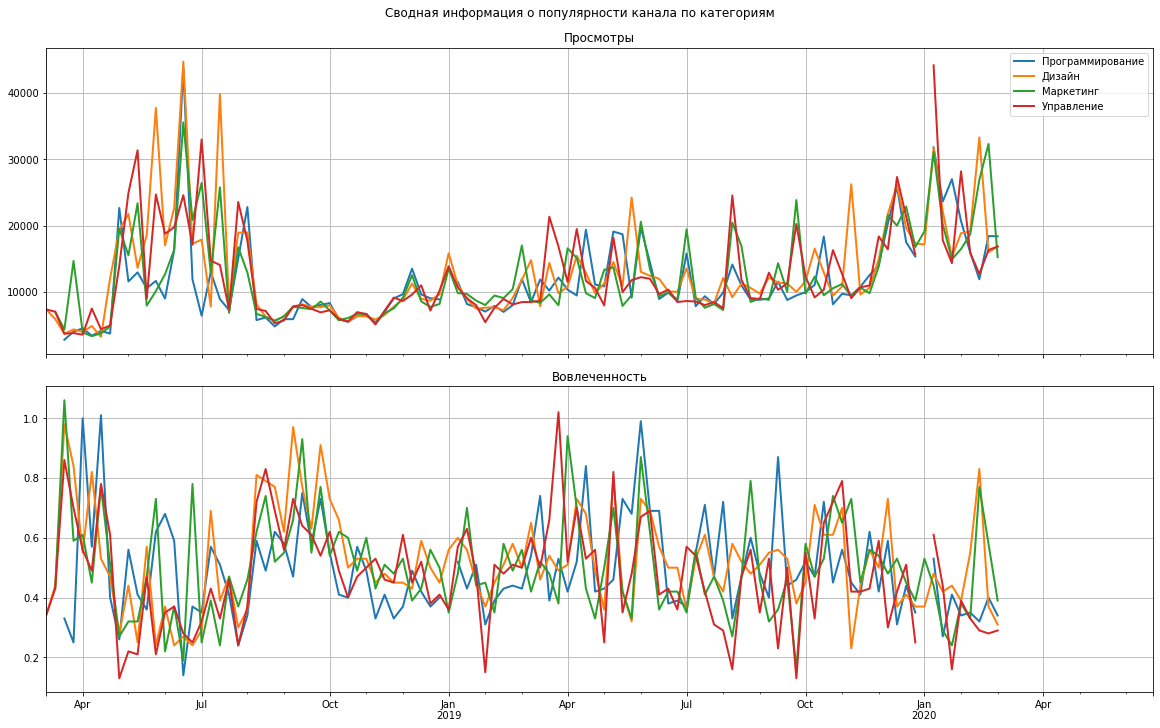

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True)
y_views = []
for i in range(skillbox_cat_len): y_views.append('views'+str(i))
y_ER = []
for i in range(skillbox_cat_len): y_ER.append('ER'+str(i))
weekly2018.plot(ax=ax[0], y=y_views, label=skillbox_categories, grid=True, sharex=True, linewidth=2
                , title='Просмотры')
weekly2018.plot(ax=ax[1], y=y_ER, grid=True, sharex=True, legend=False, linewidth=2, title='Вовлеченность'
               ).set(xlabel='')
fig.suptitle('Сводная информация о популярности канала по категориям');

Данный график практически весь состоит из острых зубцов. Попробую построить эти же данные помесячно, для более сглаженных данных

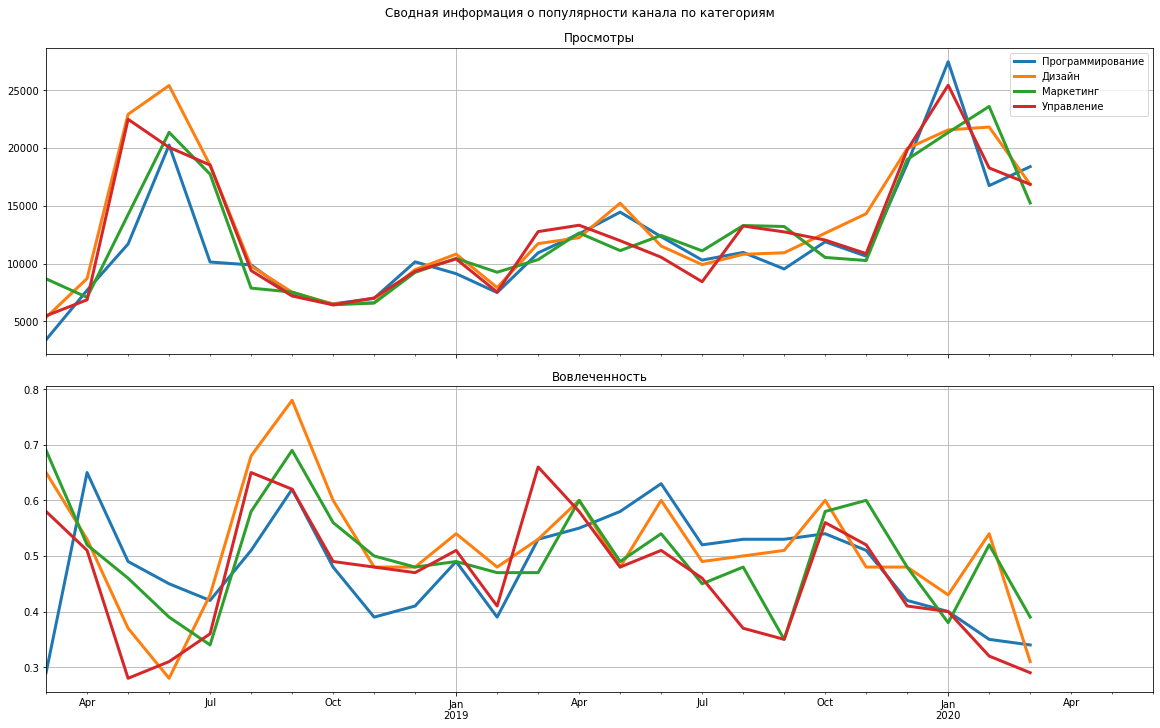

In [ ]:
# Делаю выборку по месяцам
monthly_cat = np.round(weekly2018.resample('M').agg('mean'), 2)
monthly_cat.head()

fig, ax = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True)
y_views = []; 
for i in range(skillbox_cat_len): y_views.append('views'+str(i))
y_ER = []; 
for i in range(skillbox_cat_len): y_ER.append('ER'+str(i))
monthly_cat.plot(ax=ax[0], y=y_views, label=skillbox_categories, grid=True, sharex=True, linewidth=3
                , title='Просмотры')
monthly_cat.plot(ax=ax[1], y=y_ER, grid=True, sharex=True, legend=False, linewidth=3, title='Вовлеченность'
               ).set(xlabel='')
fig.suptitle('Сводная информация о популярности канала по категориям');

Можно увидеть, что популярность постов по разным категориям близка

#### Анализируем рубрики

In [54]:
tag_regular_expr = r'(?<=\s)#\w+[@]?[\w]*'
tag_reg_expr_compiled = re.compile(tag_regular_expr)
tags_list = []

# df_tags

def text_to_tags(raw_text, debug_mode=False):
    """Возвращает список из хэштэгов в полученногм тексте"""
    result = []
    raw_text_lower = raw_text.lower()
    # разбиваем текст на слова
    tags_in_text = tag_reg_expr_compiled.findall(raw_text_lower) 
    if debug_mode: 
        print(tags_in_text)
    # Обходим все полученные тэги
    for tag in tags_in_text:
#         df_tags = df_tags.append({'tag':tag}, ignore_index=True)
#         if tags_list.count(tag)==0:
        tags_list.append(tag)
        if result.count(tag)==0:
            result.append(tag)
#     result = set(result)
    return result

In [55]:
%time df_wall2018['tags'] = df_wall2018['text'].apply(text_to_tags)
df_wall2018

CPU times: user 51.1 ms, sys: 0 ns, total: 51.1 ms
Wall time: 49.2 ms


,id,likes,reposts,views,text,ER,cat_list,cat0,cat1,cat2,cat3,tags
date,,,,,,,,,,,,
2020-02-29 08:39:51,52057,429,193,30289.0,Не хватает 24 часов в сутках и 365 дней в году...,1.42,"[0, 0, 0, 0]",0,0,0,0,[#конкурс_skillbox]
2020-02-28 16:50:53,52054,62,16,13918.0,"Как нарисовать персонажа в движении, не разбир...",0.45,"[0, 3, 0, 0]",0,3,0,0,"[#статья_skillbox, #skillbox_дизайн]"
2020-02-28 11:34:35,52053,13,1,12366.0,Встречайте 5 новых спикеров OFFF Moscow 2020. ...,0.11,"[0, 7, 1, 3]",0,7,1,3,"[#offf_moscow, #skillbox_offf]"
2020-02-27 14:59:25,52043,37,4,10674.0,Открытие бьюти салона. Ожидание: арендовали ме...,0.35,"[0, 0, 1, 2]",0,0,1,2,"[#статья_skillbox, #skillbox_управление]"
2020-02-27 12:20:57,52041,78,2,19622.0,"Что общего между йогой и дизайном? И там, и зд...",0.40,"[0, 5, 0, 1]",0,5,0,1,"[#skillbox_дизайн, #айдентика_skillbox]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-12 10:22:31,22596,14,1,3730.0,Привет!\nЛовите календарь новой недели. Выбира...,0.38,"[0, 0, 0, 0]",0,0,0,0,[]
2018-03-07 10:00:52,22586,22,0,4820.0,"Мы не можем обойтись без музыки, и поэтому пер...",0.46,"[0, 4, 0, 0]",0,4,0,0,[]
2018-03-05 14:23:45,22581,30,0,7016.0,3 марта 2018 года в офисе Skillbox прошло меро...,0.43,"[0, 2, 1, 1]",0,2,1,1,[]


In [114]:
# Считаю частоту употербления тегов
df_tags = pd.DataFrame(tags_list, columns=['tag'])

tags_count = df_tags.groupby('tag')['tag'].agg('count').to_frame()
tags_count.columns=['count']
tags_count.sort_values('count', ascending=False, inplace=True)

# Считаю усредненные показатели для постов с каждым хэштегом
for tag in tags_count.index:
    likes, reposts, views = df_wall2018[df_wall2018['tags'].apply(lambda x: tag in x)
                                        ][['likes', 'reposts', 'views']].agg('mean')
    tags_count.loc[tag, 'likes'] = likes
    tags_count.loc[tag, 'reposts'] = reposts
    tags_count.loc[tag, 'views'] = views
tags_count = np.round(tags_count, 1)
tags_count['ER'] = np.round(tags_count['likes'] / tags_count['views'], 2)
tags_count

,count,likes,reposts,views,ER
tag,,,,,
#read@skillbox_education,370,47.0,9.2,8765.2,0.01
#marketing@skillbox_education,199,65.8,15.2,12605.3,0.01
#design@skillbox_education,196,70.5,14.6,12208.9,0.01
#code@skillbox_education,190,44.0,7.2,9233.8,0.00
#skillbox_дизайн,166,86.0,11.5,14057.3,0.01
...,...,...,...,...,...
#skillbox_сострадамус,1,36.0,2.0,18456.0,0.00
#skillbox_симпсоны,1,22.0,0.0,10528.0,0.00
#skillbox_рбк,1,26.0,2.0,7411.0,0.00


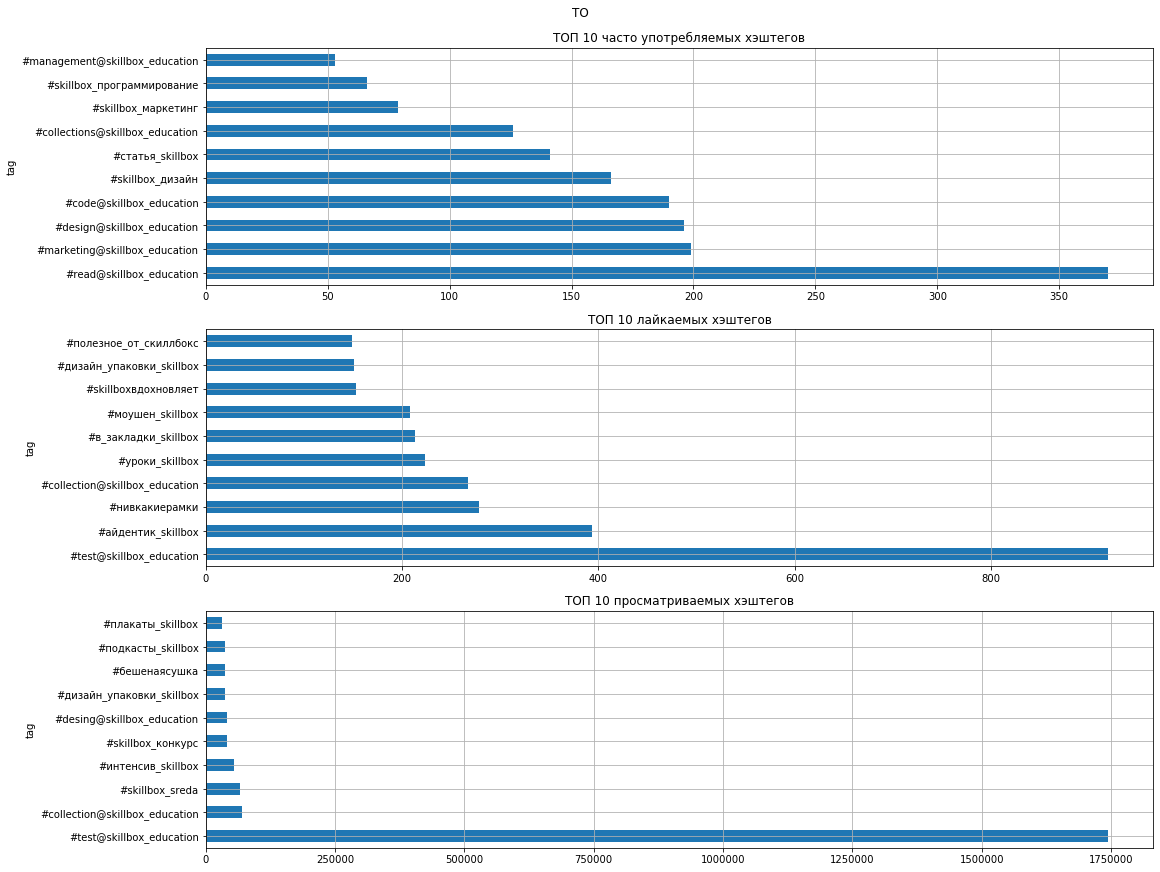

In [112]:
# Рисую список ТОП хэштегов по разным метрикам
fig, ax = plt.subplots(3, 1, figsize=(16, 12), constrained_layout=True)
tags_count.sort_values('count', ascending=False).head(10).plot.barh(
    y='count', ax=ax[0], title='ТОП 10 часто употребляемых хэштегов', legend=False, grid=True);
tags_count.sort_values('likes', ascending=False).head(10).plot.barh(
    y='likes', ax=ax[1], title='ТОП 10 лайкаемых хэштегов', legend=False, grid=True);
tags_count.sort_values('views', ascending=False).head(10).plot.barh(
    y='views', ax=ax[2], title='ТОП 10 просматриваемых хэштегов', legend=False, grid=True);
fig.suptitle('TO');